In [1]:
%matplotlib inline

In [2]:
from keras.layers import Activation, LSTM, Dense, Dropout
from keras.models import Sequential

import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split

Using TensorFlow backend.


In [3]:
Store = 67

data = pd.read_csv('train.csv', index_col="Date", parse_dates=["Date"])
data.drop(["DayOfWeek", "Customers", "Open", "Promo", "StateHoliday", "SchoolHoliday"], inplace=True, axis=1)
store = data[data.Store == Store].Sales
store_ts = store.resample("W").sum()

/home/guilherme/.local/lib/python3.5/site-packages/IPython/core/interactiveshell.py:2785: DtypeWarning: Columns (7) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [5]:
look_back = 3

scaler = MinMaxScaler((-1,1))
data_scaled = scaler.fit_transform(store_ts.values.reshape(-1, 1))

convert_to_step = lambda interval: data_scaled[interval[0]:interval[1]]
intervals = zip(range(len(data_scaled) - look_back), range(look_back, len(data_scaled)))

train_set, test_set = train_test_split(np.array(list(map(convert_to_step, intervals))), shuffle=False)

/home/guilherme/.local/lib/python3.5/site-packages/sklearn/utils/validation.py:475: DataConversionWarning: Data with input dtype int64 was converted to float64 by MinMaxScaler.
  warnings.warn(msg, DataConversionWarning)


In [6]:
X, y = train_set[:-1], train_set[1:, -1]
X_test, y_test = test_set[:-1], test_set[1:, -1]

In [7]:
model = Sequential([
    LSTM(3, input_shape=(look_back, 1), batch_size=32, stateful=True),
    Dense(1)
])
model.compile(loss='mape', optimizer='adam')
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_1 (LSTM)                (32, 3)                   60        
_________________________________________________________________
dense_1 (Dense)              (32, 1)                   4         
Total params: 64
Trainable params: 64
Non-trainable params: 0
_________________________________________________________________


In [8]:
history = model.fit(X[:-2], y[:-2], epochs=10000, validation_data=(X_test, y_test), batch_size=32)

Train on 96 samples, validate on 32 samples
Epoch 1/10000
96/96 [==============================] - 9s 94ms/step - loss: 205.1805 - val_loss: 92.0894
Epoch 2/10000
96/96 [==============================] - 0s 123us/step - loss: 204.6343 - val_loss: 92.1204
Epoch 3/10000
96/96 [==============================] - 0s 116us/step - loss: 181.9968 - val_loss: 96.9300
Epoch 4/10000
96/96 [==============================] - 0s 116us/step - loss: 178.2444 - val_loss: 96.6344
Epoch 5/10000
96/96 [==============================] - 0s 118us/step - loss: 172.0016 - val_loss: 91.4993
Epoch 6/10000
96/96 [==============================] - 0s 117us/step - loss: 167.2361 - val_loss: 91.7365
Epoch 7/10000
96/96 [==============================] - 0s 123us/step - loss: 156.3178 - val_loss: 92.3881
Epoch 8/10000
96/96 [==============================] - 0s 120us/step - loss: 151.8232 - val_loss: 93.0511
Epoch 9/10000
96/96 [==============================] - 0s 115us/step - loss: 128.3989 - val_loss: 92.6192
Epo

Epoch 77/10000
96/96 [==============================] - 0s 122us/step - loss: 110.3199 - val_loss: 96.7422
Epoch 78/10000
96/96 [==============================] - 0s 118us/step - loss: 112.4987 - val_loss: 98.3430
Epoch 79/10000
96/96 [==============================] - 0s 119us/step - loss: 116.9160 - val_loss: 97.2419
Epoch 80/10000
96/96 [==============================] - 0s 122us/step - loss: 115.1643 - val_loss: 98.0700
Epoch 81/10000
96/96 [==============================] - 0s 116us/step - loss: 113.5347 - val_loss: 100.5595
Epoch 82/10000
96/96 [==============================] - 0s 119us/step - loss: 109.9335 - val_loss: 99.6753
Epoch 83/10000
96/96 [==============================] - 0s 118us/step - loss: 114.6914 - val_loss: 98.7422
Epoch 84/10000
96/96 [==============================] - 0s 118us/step - loss: 109.0149 - val_loss: 98.2268
Epoch 85/10000
96/96 [==============================] - 0s 126us/step - loss: 115.2619 - val_loss: 96.4099
Epoch 86/10000
96/96 [==============

Epoch 153/10000
96/96 [==============================] - 0s 117us/step - loss: 109.0441 - val_loss: 95.8420
Epoch 154/10000
96/96 [==============================] - 0s 115us/step - loss: 105.0620 - val_loss: 94.0030
Epoch 155/10000
96/96 [==============================] - 0s 124us/step - loss: 107.3300 - val_loss: 94.3506
Epoch 156/10000
96/96 [==============================] - 0s 122us/step - loss: 111.6812 - val_loss: 95.6886
Epoch 157/10000
96/96 [==============================] - 0s 117us/step - loss: 100.6561 - val_loss: 97.2783
Epoch 158/10000
96/96 [==============================] - 0s 119us/step - loss: 103.7776 - val_loss: 94.8903
Epoch 159/10000
96/96 [==============================] - 0s 116us/step - loss: 113.7038 - val_loss: 95.4876
Epoch 160/10000
96/96 [==============================] - 0s 121us/step - loss: 100.2315 - val_loss: 96.5058
Epoch 161/10000
96/96 [==============================] - 0s 124us/step - loss: 102.7737 - val_loss: 94.9229
Epoch 162/10000
96/96 [=====

Epoch 229/10000
96/96 [==============================] - 0s 116us/step - loss: 102.7607 - val_loss: 96.7457
Epoch 230/10000
96/96 [==============================] - 0s 115us/step - loss: 97.9602 - val_loss: 99.4024
Epoch 231/10000
96/96 [==============================] - 0s 121us/step - loss: 104.7999 - val_loss: 98.8671
Epoch 232/10000
96/96 [==============================] - 0s 122us/step - loss: 103.1682 - val_loss: 100.0163
Epoch 233/10000
96/96 [==============================] - 0s 115us/step - loss: 102.9061 - val_loss: 100.3669
Epoch 234/10000
96/96 [==============================] - 0s 119us/step - loss: 104.7820 - val_loss: 95.5334
Epoch 235/10000
96/96 [==============================] - 0s 119us/step - loss: 107.8934 - val_loss: 100.7272
Epoch 236/10000
96/96 [==============================] - 0s 118us/step - loss: 113.0063 - val_loss: 99.8104
Epoch 237/10000
96/96 [==============================] - 0s 118us/step - loss: 101.1344 - val_loss: 98.3689
Epoch 238/10000
96/96 [===

Epoch 305/10000
96/96 [==============================] - 0s 114us/step - loss: 99.9245 - val_loss: 96.6484
Epoch 306/10000
96/96 [==============================] - 0s 115us/step - loss: 97.2620 - val_loss: 98.9746
Epoch 307/10000
96/96 [==============================] - 0s 120us/step - loss: 101.7828 - val_loss: 100.4496
Epoch 308/10000
96/96 [==============================] - 0s 115us/step - loss: 98.9394 - val_loss: 97.9384
Epoch 309/10000
96/96 [==============================] - 0s 119us/step - loss: 100.3454 - val_loss: 101.1732
Epoch 310/10000
96/96 [==============================] - 0s 115us/step - loss: 99.0927 - val_loss: 102.8415
Epoch 311/10000
96/96 [==============================] - 0s 120us/step - loss: 104.5648 - val_loss: 100.0919
Epoch 312/10000
96/96 [==============================] - 0s 117us/step - loss: 99.7482 - val_loss: 101.5034
Epoch 313/10000
96/96 [==============================] - 0s 118us/step - loss: 100.9641 - val_loss: 97.2623
Epoch 314/10000
96/96 [=====

96/96 [==============================] - 0s 125us/step - loss: 98.8874 - val_loss: 98.3563
Epoch 382/10000
96/96 [==============================] - 0s 116us/step - loss: 102.4836 - val_loss: 97.6179
Epoch 383/10000
96/96 [==============================] - 0s 115us/step - loss: 95.9546 - val_loss: 97.8401
Epoch 384/10000
96/96 [==============================] - 0s 118us/step - loss: 100.4749 - val_loss: 98.6248
Epoch 385/10000
96/96 [==============================] - 0s 130us/step - loss: 98.2449 - val_loss: 99.1277
Epoch 386/10000
96/96 [==============================] - 0s 116us/step - loss: 97.8133 - val_loss: 99.1980
Epoch 387/10000
96/96 [==============================] - 0s 126us/step - loss: 101.3772 - val_loss: 97.5532
Epoch 388/10000
96/96 [==============================] - 0s 117us/step - loss: 97.2424 - val_loss: 97.9277
Epoch 389/10000
96/96 [==============================] - 0s 115us/step - loss: 96.5657 - val_loss: 97.8799
Epoch 390/10000
96/96 [===========================

96/96 [==============================] - 0s 116us/step - loss: 98.0300 - val_loss: 98.3413
Epoch 458/10000
96/96 [==============================] - 0s 116us/step - loss: 98.5594 - val_loss: 97.7181
Epoch 459/10000
96/96 [==============================] - 0s 128us/step - loss: 97.8964 - val_loss: 98.2390
Epoch 460/10000
96/96 [==============================] - 0s 131us/step - loss: 100.1895 - val_loss: 98.5536
Epoch 461/10000
96/96 [==============================] - 0s 117us/step - loss: 97.8257 - val_loss: 99.4327
Epoch 462/10000
96/96 [==============================] - 0s 113us/step - loss: 98.1146 - val_loss: 98.8847
Epoch 463/10000
96/96 [==============================] - 0s 118us/step - loss: 100.7619 - val_loss: 97.1962
Epoch 464/10000
96/96 [==============================] - 0s 115us/step - loss: 99.7018 - val_loss: 97.1606
Epoch 465/10000
96/96 [==============================] - 0s 122us/step - loss: 99.4379 - val_loss: 97.3016
Epoch 466/10000
96/96 [============================

96/96 [==============================] - 0s 117us/step - loss: 99.0579 - val_loss: 99.0189
Epoch 534/10000
96/96 [==============================] - 0s 117us/step - loss: 98.1972 - val_loss: 99.1392
Epoch 535/10000
96/96 [==============================] - 0s 114us/step - loss: 97.2986 - val_loss: 98.8619
Epoch 536/10000
96/96 [==============================] - 0s 119us/step - loss: 97.1516 - val_loss: 99.8170
Epoch 537/10000
96/96 [==============================] - 0s 122us/step - loss: 97.6102 - val_loss: 98.2540
Epoch 538/10000
96/96 [==============================] - 0s 116us/step - loss: 98.5604 - val_loss: 98.9176
Epoch 539/10000
96/96 [==============================] - 0s 116us/step - loss: 98.6882 - val_loss: 98.1261
Epoch 540/10000
96/96 [==============================] - 0s 123us/step - loss: 98.0851 - val_loss: 99.1690
Epoch 541/10000
96/96 [==============================] - 0s 131us/step - loss: 98.2468 - val_loss: 98.0180
Epoch 542/10000
96/96 [==============================

96/96 [==============================] - 0s 117us/step - loss: 99.6846 - val_loss: 98.2973
Epoch 610/10000
96/96 [==============================] - 0s 114us/step - loss: 99.1585 - val_loss: 97.6559
Epoch 611/10000
96/96 [==============================] - 0s 118us/step - loss: 99.0472 - val_loss: 98.5212
Epoch 612/10000
96/96 [==============================] - 0s 127us/step - loss: 98.3053 - val_loss: 98.4069
Epoch 613/10000
96/96 [==============================] - 0s 118us/step - loss: 97.2752 - val_loss: 98.4806
Epoch 614/10000
96/96 [==============================] - 0s 118us/step - loss: 99.1137 - val_loss: 98.7952
Epoch 615/10000
96/96 [==============================] - 0s 119us/step - loss: 99.7316 - val_loss: 98.4319
Epoch 616/10000
96/96 [==============================] - 0s 122us/step - loss: 96.5696 - val_loss: 98.8911
Epoch 617/10000
96/96 [==============================] - 0s 121us/step - loss: 98.3652 - val_loss: 99.1246
Epoch 618/10000
96/96 [==============================

96/96 [==============================] - 0s 126us/step - loss: 98.6208 - val_loss: 97.9090
Epoch 686/10000
96/96 [==============================] - 0s 122us/step - loss: 98.6565 - val_loss: 97.5123
Epoch 687/10000
96/96 [==============================] - 0s 120us/step - loss: 98.0517 - val_loss: 98.2514
Epoch 688/10000
96/96 [==============================] - 0s 117us/step - loss: 98.9550 - val_loss: 98.0294
Epoch 689/10000
96/96 [==============================] - 0s 127us/step - loss: 98.7103 - val_loss: 99.1538
Epoch 690/10000
96/96 [==============================] - 0s 129us/step - loss: 98.3191 - val_loss: 100.0732
Epoch 691/10000
96/96 [==============================] - 0s 123us/step - loss: 98.5145 - val_loss: 100.4389
Epoch 692/10000
96/96 [==============================] - 0s 126us/step - loss: 97.5637 - val_loss: 97.9927
Epoch 693/10000
96/96 [==============================] - 0s 138us/step - loss: 97.9841 - val_loss: 98.3841
Epoch 694/10000
96/96 [============================

96/96 [==============================] - 0s 126us/step - loss: 98.6349 - val_loss: 98.8012
Epoch 762/10000
96/96 [==============================] - 0s 119us/step - loss: 99.2052 - val_loss: 99.5187
Epoch 763/10000
96/96 [==============================] - 0s 133us/step - loss: 98.4596 - val_loss: 99.1793
Epoch 764/10000
96/96 [==============================] - 0s 118us/step - loss: 96.6323 - val_loss: 98.4970
Epoch 765/10000
96/96 [==============================] - 0s 120us/step - loss: 98.2277 - val_loss: 98.2332
Epoch 766/10000
96/96 [==============================] - 0s 114us/step - loss: 99.1786 - val_loss: 97.7614
Epoch 767/10000
96/96 [==============================] - 0s 115us/step - loss: 98.3588 - val_loss: 99.5185
Epoch 768/10000
96/96 [==============================] - 0s 117us/step - loss: 97.7568 - val_loss: 98.0884
Epoch 769/10000
96/96 [==============================] - 0s 116us/step - loss: 98.3518 - val_loss: 98.6443
Epoch 770/10000
96/96 [==============================

96/96 [==============================] - 0s 129us/step - loss: 98.4895 - val_loss: 99.5394
Epoch 838/10000
96/96 [==============================] - 0s 129us/step - loss: 98.7028 - val_loss: 99.2001
Epoch 839/10000
96/96 [==============================] - 0s 118us/step - loss: 96.7949 - val_loss: 99.2061
Epoch 840/10000
96/96 [==============================] - 0s 118us/step - loss: 97.1303 - val_loss: 97.8314
Epoch 841/10000
96/96 [==============================] - 0s 127us/step - loss: 98.0121 - val_loss: 97.7792
Epoch 842/10000
96/96 [==============================] - 0s 131us/step - loss: 99.1695 - val_loss: 97.7472
Epoch 843/10000
96/96 [==============================] - 0s 119us/step - loss: 99.4908 - val_loss: 97.9177
Epoch 844/10000
96/96 [==============================] - 0s 117us/step - loss: 97.2470 - val_loss: 98.0827
Epoch 845/10000
96/96 [==============================] - 0s 123us/step - loss: 96.7878 - val_loss: 98.7441
Epoch 846/10000
96/96 [==============================

96/96 [==============================] - 0s 116us/step - loss: 98.1364 - val_loss: 97.1351
Epoch 914/10000
96/96 [==============================] - 0s 122us/step - loss: 98.2639 - val_loss: 97.7348
Epoch 915/10000
96/96 [==============================] - 0s 117us/step - loss: 97.2521 - val_loss: 97.1885
Epoch 916/10000
96/96 [==============================] - 0s 123us/step - loss: 98.0555 - val_loss: 97.8960
Epoch 917/10000
96/96 [==============================] - 0s 121us/step - loss: 97.9210 - val_loss: 97.9905
Epoch 918/10000
96/96 [==============================] - 0s 132us/step - loss: 97.9202 - val_loss: 98.4842
Epoch 919/10000
96/96 [==============================] - 0s 119us/step - loss: 95.9198 - val_loss: 98.1123
Epoch 920/10000
96/96 [==============================] - 0s 117us/step - loss: 97.9283 - val_loss: 98.5587
Epoch 921/10000
96/96 [==============================] - 0s 118us/step - loss: 98.8184 - val_loss: 98.6493
Epoch 922/10000
96/96 [==============================

96/96 [==============================] - 0s 119us/step - loss: 98.3557 - val_loss: 97.7470
Epoch 990/10000
96/96 [==============================] - 0s 118us/step - loss: 97.1856 - val_loss: 98.8471
Epoch 991/10000
96/96 [==============================] - 0s 118us/step - loss: 98.5329 - val_loss: 98.8988
Epoch 992/10000
96/96 [==============================] - 0s 124us/step - loss: 98.9283 - val_loss: 99.1363
Epoch 993/10000
96/96 [==============================] - 0s 123us/step - loss: 97.8732 - val_loss: 99.4339
Epoch 994/10000
96/96 [==============================] - 0s 121us/step - loss: 97.2146 - val_loss: 98.2636
Epoch 995/10000
96/96 [==============================] - 0s 118us/step - loss: 97.5083 - val_loss: 98.8931
Epoch 996/10000
96/96 [==============================] - 0s 119us/step - loss: 99.5634 - val_loss: 97.9424
Epoch 997/10000
96/96 [==============================] - 0s 117us/step - loss: 97.7068 - val_loss: 97.6836
Epoch 998/10000
96/96 [==============================

96/96 [==============================] - 0s 146us/step - loss: 97.8611 - val_loss: 99.4794
Epoch 1066/10000
96/96 [==============================] - 0s 137us/step - loss: 96.9159 - val_loss: 98.8215
Epoch 1067/10000
96/96 [==============================] - 0s 139us/step - loss: 96.8697 - val_loss: 98.9788
Epoch 1068/10000
96/96 [==============================] - 0s 137us/step - loss: 97.0001 - val_loss: 99.6580
Epoch 1069/10000
96/96 [==============================] - 0s 142us/step - loss: 98.5230 - val_loss: 99.2535
Epoch 1070/10000
96/96 [==============================] - 0s 139us/step - loss: 97.2125 - val_loss: 96.7950
Epoch 1071/10000
96/96 [==============================] - 0s 119us/step - loss: 97.2387 - val_loss: 98.2731
Epoch 1072/10000
96/96 [==============================] - 0s 124us/step - loss: 98.0095 - val_loss: 97.1370
Epoch 1073/10000
96/96 [==============================] - 0s 118us/step - loss: 96.9846 - val_loss: 96.9418
Epoch 1074/10000
96/96 [=====================

Epoch 1141/10000
96/96 [==============================] - 0s 145us/step - loss: 97.7781 - val_loss: 99.4773
Epoch 1142/10000
96/96 [==============================] - 0s 144us/step - loss: 97.9305 - val_loss: 98.9723
Epoch 1143/10000
96/96 [==============================] - 0s 140us/step - loss: 97.9566 - val_loss: 99.3740
Epoch 1144/10000
96/96 [==============================] - 0s 142us/step - loss: 97.7472 - val_loss: 98.4506
Epoch 1145/10000
96/96 [==============================] - 0s 129us/step - loss: 96.4049 - val_loss: 98.5105
Epoch 1146/10000
96/96 [==============================] - 0s 144us/step - loss: 99.0096 - val_loss: 99.1831
Epoch 1147/10000
96/96 [==============================] - 0s 128us/step - loss: 97.2865 - val_loss: 98.7619
Epoch 1148/10000
96/96 [==============================] - 0s 130us/step - loss: 98.6249 - val_loss: 99.1134
Epoch 1149/10000
96/96 [==============================] - 0s 133us/step - loss: 96.5726 - val_loss: 98.7211
Epoch 1150/10000
96/96 [====

Epoch 1217/10000
96/96 [==============================] - 0s 121us/step - loss: 98.3693 - val_loss: 98.2893
Epoch 1218/10000
96/96 [==============================] - 0s 124us/step - loss: 97.5482 - val_loss: 98.5838
Epoch 1219/10000
96/96 [==============================] - 0s 134us/step - loss: 98.2615 - val_loss: 99.6019
Epoch 1220/10000
96/96 [==============================] - 0s 123us/step - loss: 97.7768 - val_loss: 98.9105
Epoch 1221/10000
96/96 [==============================] - ETA: 0s - loss: 101.165 - 0s 126us/step - loss: 98.6703 - val_loss: 98.5737
Epoch 1222/10000
96/96 [==============================] - 0s 129us/step - loss: 97.7178 - val_loss: 98.7054
Epoch 1223/10000
96/96 [==============================] - 0s 128us/step - loss: 96.8006 - val_loss: 99.3990
Epoch 1224/10000
96/96 [==============================] - 0s 128us/step - loss: 96.9275 - val_loss: 98.3250
Epoch 1225/10000
96/96 [==============================] - 0s 126us/step - loss: 97.8225 - val_loss: 97.9511
Ep

96/96 [==============================] - 0s 123us/step - loss: 98.1349 - val_loss: 98.7666
Epoch 1293/10000
96/96 [==============================] - 0s 122us/step - loss: 97.1353 - val_loss: 98.4796
Epoch 1294/10000
96/96 [==============================] - 0s 117us/step - loss: 96.8555 - val_loss: 98.1557
Epoch 1295/10000
96/96 [==============================] - 0s 118us/step - loss: 96.8688 - val_loss: 97.5392
Epoch 1296/10000
96/96 [==============================] - 0s 117us/step - loss: 96.7845 - val_loss: 97.3452
Epoch 1297/10000
96/96 [==============================] - 0s 126us/step - loss: 97.9494 - val_loss: 98.3200
Epoch 1298/10000
96/96 [==============================] - 0s 128us/step - loss: 97.2523 - val_loss: 99.1712
Epoch 1299/10000
96/96 [==============================] - 0s 121us/step - loss: 99.2558 - val_loss: 99.1821
Epoch 1300/10000
96/96 [==============================] - 0s 118us/step - loss: 97.3854 - val_loss: 99.5750
Epoch 1301/10000
96/96 [=====================

Epoch 1368/10000
96/96 [==============================] - 0s 125us/step - loss: 96.1708 - val_loss: 98.6215
Epoch 1369/10000
96/96 [==============================] - 0s 127us/step - loss: 96.5742 - val_loss: 98.5055
Epoch 1370/10000
96/96 [==============================] - 0s 131us/step - loss: 98.5476 - val_loss: 99.1563
Epoch 1371/10000
96/96 [==============================] - 0s 136us/step - loss: 97.1283 - val_loss: 99.6264
Epoch 1372/10000
96/96 [==============================] - 0s 133us/step - loss: 97.5947 - val_loss: 99.0675
Epoch 1373/10000
96/96 [==============================] - 0s 126us/step - loss: 96.5290 - val_loss: 98.0810
Epoch 1374/10000
96/96 [==============================] - 0s 135us/step - loss: 96.6875 - val_loss: 97.9994
Epoch 1375/10000
96/96 [==============================] - 0s 129us/step - loss: 96.3366 - val_loss: 98.0630
Epoch 1376/10000
96/96 [==============================] - 0s 139us/step - loss: 96.9176 - val_loss: 98.5521
Epoch 1377/10000
96/96 [====

Epoch 1444/10000
96/96 [==============================] - 0s 149us/step - loss: 96.8566 - val_loss: 98.3302
Epoch 1445/10000
96/96 [==============================] - 0s 173us/step - loss: 96.6183 - val_loss: 98.4322
Epoch 1446/10000
96/96 [==============================] - 0s 164us/step - loss: 96.6952 - val_loss: 97.7845
Epoch 1447/10000
96/96 [==============================] - 0s 155us/step - loss: 97.9742 - val_loss: 97.5320
Epoch 1448/10000
96/96 [==============================] - 0s 160us/step - loss: 96.1805 - val_loss: 98.0382
Epoch 1449/10000
96/96 [==============================] - 0s 146us/step - loss: 98.1032 - val_loss: 97.9848
Epoch 1450/10000
96/96 [==============================] - 0s 140us/step - loss: 98.1695 - val_loss: 98.6489
Epoch 1451/10000
96/96 [==============================] - 0s 172us/step - loss: 97.5358 - val_loss: 98.3004
Epoch 1452/10000
96/96 [==============================] - 0s 158us/step - loss: 97.8979 - val_loss: 99.0871
Epoch 1453/10000
96/96 [====

Epoch 1520/10000
96/96 [==============================] - 0s 119us/step - loss: 96.7351 - val_loss: 98.3161
Epoch 1521/10000
96/96 [==============================] - 0s 122us/step - loss: 96.1221 - val_loss: 97.6572
Epoch 1522/10000
96/96 [==============================] - 0s 137us/step - loss: 96.7979 - val_loss: 97.8655
Epoch 1523/10000
96/96 [==============================] - 0s 120us/step - loss: 97.9063 - val_loss: 98.0930
Epoch 1524/10000
96/96 [==============================] - 0s 118us/step - loss: 98.4157 - val_loss: 98.3704
Epoch 1525/10000
96/96 [==============================] - 0s 119us/step - loss: 96.8937 - val_loss: 98.8669
Epoch 1526/10000
96/96 [==============================] - 0s 118us/step - loss: 98.1465 - val_loss: 98.8013
Epoch 1527/10000
96/96 [==============================] - 0s 123us/step - loss: 97.1912 - val_loss: 98.5313
Epoch 1528/10000
96/96 [==============================] - 0s 118us/step - loss: 96.4130 - val_loss: 97.9992
Epoch 1529/10000
96/96 [====

Epoch 1596/10000
96/96 [==============================] - 0s 118us/step - loss: 97.9202 - val_loss: 98.0058
Epoch 1597/10000
96/96 [==============================] - 0s 118us/step - loss: 96.2537 - val_loss: 98.9450
Epoch 1598/10000
96/96 [==============================] - 0s 124us/step - loss: 96.5292 - val_loss: 99.2445
Epoch 1599/10000
96/96 [==============================] - 0s 117us/step - loss: 98.8014 - val_loss: 98.8295
Epoch 1600/10000
96/96 [==============================] - 0s 118us/step - loss: 96.7000 - val_loss: 98.2696
Epoch 1601/10000
96/96 [==============================] - 0s 117us/step - loss: 97.4113 - val_loss: 98.7289
Epoch 1602/10000
96/96 [==============================] - 0s 119us/step - loss: 95.7200 - val_loss: 97.1987
Epoch 1603/10000
96/96 [==============================] - 0s 119us/step - loss: 97.1903 - val_loss: 97.7623
Epoch 1604/10000
96/96 [==============================] - 0s 121us/step - loss: 96.7564 - val_loss: 98.2195
Epoch 1605/10000
96/96 [====

Epoch 1672/10000
96/96 [==============================] - 0s 119us/step - loss: 95.4756 - val_loss: 98.0117
Epoch 1673/10000
96/96 [==============================] - 0s 119us/step - loss: 101.1027 - val_loss: 97.6684
Epoch 1674/10000
96/96 [==============================] - 0s 120us/step - loss: 100.9494 - val_loss: 97.8213
Epoch 1675/10000
96/96 [==============================] - 0s 120us/step - loss: 95.3102 - val_loss: 97.7988
Epoch 1676/10000
96/96 [==============================] - 0s 121us/step - loss: 96.7085 - val_loss: 98.5194
Epoch 1677/10000
96/96 [==============================] - 0s 117us/step - loss: 95.3972 - val_loss: 98.5745
Epoch 1678/10000
96/96 [==============================] - 0s 115us/step - loss: 97.8800 - val_loss: 98.3396
Epoch 1679/10000
96/96 [==============================] - 0s 118us/step - loss: 94.8398 - val_loss: 97.2616
Epoch 1680/10000
96/96 [==============================] - 0s 116us/step - loss: 97.7560 - val_loss: 96.5936
Epoch 1681/10000
96/96 [==

Epoch 1748/10000
96/96 [==============================] - 0s 122us/step - loss: 100.1100 - val_loss: 96.1015
Epoch 1749/10000
96/96 [==============================] - 0s 119us/step - loss: 96.8538 - val_loss: 97.9693
Epoch 1750/10000
96/96 [==============================] - 0s 117us/step - loss: 97.1498 - val_loss: 97.4521
Epoch 1751/10000
96/96 [==============================] - 0s 119us/step - loss: 96.6572 - val_loss: 97.6792
Epoch 1752/10000
96/96 [==============================] - 0s 117us/step - loss: 97.2437 - val_loss: 98.0741
Epoch 1753/10000
96/96 [==============================] - 0s 124us/step - loss: 96.2550 - val_loss: 98.0947
Epoch 1754/10000
96/96 [==============================] - 0s 120us/step - loss: 97.4344 - val_loss: 98.4928
Epoch 1755/10000
96/96 [==============================] - 0s 121us/step - loss: 95.8892 - val_loss: 98.1010
Epoch 1756/10000
96/96 [==============================] - 0s 118us/step - loss: 95.8447 - val_loss: 97.2627
Epoch 1757/10000
96/96 [===

96/96 [==============================] - 0s 117us/step - loss: 96.0933 - val_loss: 97.5773
Epoch 1824/10000
96/96 [==============================] - 0s 118us/step - loss: 94.9876 - val_loss: 97.5712
Epoch 1825/10000
96/96 [==============================] - 0s 114us/step - loss: 97.6684 - val_loss: 96.5974
Epoch 1826/10000
96/96 [==============================] - 0s 117us/step - loss: 97.2133 - val_loss: 96.3520
Epoch 1827/10000
96/96 [==============================] - 0s 116us/step - loss: 96.0442 - val_loss: 96.7986
Epoch 1828/10000
96/96 [==============================] - 0s 114us/step - loss: 99.3622 - val_loss: 97.6938
Epoch 1829/10000
96/96 [==============================] - 0s 116us/step - loss: 96.6612 - val_loss: 97.6726
Epoch 1830/10000
96/96 [==============================] - 0s 122us/step - loss: 99.9315 - val_loss: 97.7527
Epoch 1831/10000
96/96 [==============================] - 0s 119us/step - loss: 96.3785 - val_loss: 97.7160
Epoch 1832/10000
96/96 [=====================

Epoch 1899/10000
96/96 [==============================] - 0s 124us/step - loss: 96.0586 - val_loss: 96.5580
Epoch 1900/10000
96/96 [==============================] - 0s 119us/step - loss: 95.2730 - val_loss: 97.4941
Epoch 1901/10000
96/96 [==============================] - 0s 129us/step - loss: 97.3135 - val_loss: 97.2059
Epoch 1902/10000
96/96 [==============================] - 0s 115us/step - loss: 95.9775 - val_loss: 97.2282
Epoch 1903/10000
96/96 [==============================] - 0s 115us/step - loss: 96.8615 - val_loss: 96.2801
Epoch 1904/10000
96/96 [==============================] - 0s 123us/step - loss: 95.3257 - val_loss: 97.3073
Epoch 1905/10000
96/96 [==============================] - 0s 117us/step - loss: 96.5487 - val_loss: 97.3397
Epoch 1906/10000
96/96 [==============================] - 0s 115us/step - loss: 95.5745 - val_loss: 96.6490
Epoch 1907/10000
96/96 [==============================] - 0s 116us/step - loss: 95.0654 - val_loss: 96.6776
Epoch 1908/10000
96/96 [====

Epoch 1975/10000
96/96 [==============================] - 0s 119us/step - loss: 97.2372 - val_loss: 97.3315
Epoch 1976/10000
96/96 [==============================] - 0s 122us/step - loss: 96.1991 - val_loss: 96.1661
Epoch 1977/10000
96/96 [==============================] - 0s 118us/step - loss: 94.3171 - val_loss: 95.3685
Epoch 1978/10000
96/96 [==============================] - 0s 116us/step - loss: 95.3620 - val_loss: 95.6806
Epoch 1979/10000
96/96 [==============================] - 0s 116us/step - loss: 96.4272 - val_loss: 94.7098
Epoch 1980/10000
96/96 [==============================] - 0s 119us/step - loss: 95.8314 - val_loss: 95.6388
Epoch 1981/10000
96/96 [==============================] - 0s 116us/step - loss: 97.0437 - val_loss: 95.2925
Epoch 1982/10000
96/96 [==============================] - 0s 116us/step - loss: 96.4774 - val_loss: 97.3489
Epoch 1983/10000
96/96 [==============================] - 0s 116us/step - loss: 94.6599 - val_loss: 96.9886
Epoch 1984/10000
96/96 [====

Epoch 2051/10000
96/96 [==============================] - 0s 119us/step - loss: 97.5412 - val_loss: 95.4788
Epoch 2052/10000
96/96 [==============================] - 0s 115us/step - loss: 95.5491 - val_loss: 95.4385
Epoch 2053/10000
96/96 [==============================] - 0s 121us/step - loss: 93.5971 - val_loss: 95.4072
Epoch 2054/10000
96/96 [==============================] - 0s 116us/step - loss: 96.2677 - val_loss: 94.7076
Epoch 2055/10000
96/96 [==============================] - 0s 117us/step - loss: 94.0399 - val_loss: 95.9308
Epoch 2056/10000
96/96 [==============================] - 0s 117us/step - loss: 96.3145 - val_loss: 95.8085
Epoch 2057/10000
96/96 [==============================] - 0s 118us/step - loss: 94.7589 - val_loss: 95.2448
Epoch 2058/10000
96/96 [==============================] - 0s 119us/step - loss: 96.2567 - val_loss: 95.0348
Epoch 2059/10000
96/96 [==============================] - 0s 123us/step - loss: 94.2184 - val_loss: 96.1617
Epoch 2060/10000
96/96 [====

96/96 [==============================] - 0s 117us/step - loss: 94.0334 - val_loss: 95.0127
Epoch 2127/10000
96/96 [==============================] - 0s 117us/step - loss: 99.5309 - val_loss: 95.0120
Epoch 2128/10000
96/96 [==============================] - 0s 117us/step - loss: 94.3413 - val_loss: 95.1682
Epoch 2129/10000
96/96 [==============================] - 0s 115us/step - loss: 94.1480 - val_loss: 95.9322
Epoch 2130/10000
96/96 [==============================] - 0s 116us/step - loss: 94.1760 - val_loss: 94.8337
Epoch 2131/10000
96/96 [==============================] - 0s 116us/step - loss: 97.9809 - val_loss: 96.5212
Epoch 2132/10000
96/96 [==============================] - 0s 116us/step - loss: 96.2644 - val_loss: 96.5151
Epoch 2133/10000
96/96 [==============================] - 0s 124us/step - loss: 96.1950 - val_loss: 96.1565
Epoch 2134/10000
96/96 [==============================] - 0s 120us/step - loss: 97.5871 - val_loss: 96.6238
Epoch 2135/10000
96/96 [=====================

96/96 [==============================] - 0s 120us/step - loss: 94.8601 - val_loss: 94.2615
Epoch 2203/10000
96/96 [==============================] - 0s 114us/step - loss: 95.2146 - val_loss: 95.8392
Epoch 2204/10000
96/96 [==============================] - 0s 117us/step - loss: 95.9298 - val_loss: 96.4753
Epoch 2205/10000
96/96 [==============================] - 0s 136us/step - loss: 96.2275 - val_loss: 97.2246
Epoch 2206/10000
96/96 [==============================] - 0s 115us/step - loss: 96.5318 - val_loss: 96.4568
Epoch 2207/10000
96/96 [==============================] - 0s 119us/step - loss: 94.4446 - val_loss: 96.0172
Epoch 2208/10000
96/96 [==============================] - 0s 127us/step - loss: 93.2587 - val_loss: 93.9831
Epoch 2209/10000
96/96 [==============================] - 0s 117us/step - loss: 96.3056 - val_loss: 94.7074
Epoch 2210/10000
96/96 [==============================] - 0s 117us/step - loss: 95.9702 - val_loss: 95.2185
Epoch 2211/10000
96/96 [=====================

96/96 [==============================] - 0s 117us/step - loss: 93.5829 - val_loss: 96.5459
Epoch 2279/10000
96/96 [==============================] - 0s 130us/step - loss: 95.1529 - val_loss: 96.1700
Epoch 2280/10000
96/96 [==============================] - 0s 115us/step - loss: 96.1697 - val_loss: 95.3187
Epoch 2281/10000
96/96 [==============================] - 0s 123us/step - loss: 93.4965 - val_loss: 95.3639
Epoch 2282/10000
96/96 [==============================] - 0s 121us/step - loss: 94.5202 - val_loss: 94.7218
Epoch 2283/10000
96/96 [==============================] - 0s 117us/step - loss: 99.9275 - val_loss: 95.0497
Epoch 2284/10000
96/96 [==============================] - 0s 118us/step - loss: 93.9799 - val_loss: 94.5920
Epoch 2285/10000
96/96 [==============================] - 0s 120us/step - loss: 94.6629 - val_loss: 94.8534
Epoch 2286/10000
96/96 [==============================] - 0s 113us/step - loss: 95.2795 - val_loss: 95.0997
Epoch 2287/10000
96/96 [=====================

96/96 [==============================] - 0s 116us/step - loss: 94.9949 - val_loss: 95.2028
Epoch 2355/10000
96/96 [==============================] - 0s 122us/step - loss: 96.4501 - val_loss: 96.1485
Epoch 2356/10000
96/96 [==============================] - 0s 125us/step - loss: 94.0213 - val_loss: 96.9163
Epoch 2357/10000
96/96 [==============================] - 0s 120us/step - loss: 96.3994 - val_loss: 95.1184
Epoch 2358/10000
96/96 [==============================] - 0s 116us/step - loss: 93.9288 - val_loss: 94.7444
Epoch 2359/10000
96/96 [==============================] - 0s 116us/step - loss: 96.4565 - val_loss: 96.6175
Epoch 2360/10000
96/96 [==============================] - 0s 120us/step - loss: 94.9392 - val_loss: 95.9900
Epoch 2361/10000
96/96 [==============================] - 0s 114us/step - loss: 95.4339 - val_loss: 96.1288
Epoch 2362/10000
96/96 [==============================] - 0s 114us/step - loss: 95.5713 - val_loss: 96.4610
Epoch 2363/10000
96/96 [=====================

96/96 [==============================] - 0s 115us/step - loss: 95.7044 - val_loss: 95.8082
Epoch 2431/10000
96/96 [==============================] - 0s 124us/step - loss: 97.0018 - val_loss: 95.4701
Epoch 2432/10000
96/96 [==============================] - 0s 114us/step - loss: 94.7970 - val_loss: 95.6316
Epoch 2433/10000
96/96 [==============================] - 0s 115us/step - loss: 93.8295 - val_loss: 94.7657
Epoch 2434/10000
96/96 [==============================] - 0s 116us/step - loss: 93.9966 - val_loss: 95.7020
Epoch 2435/10000
96/96 [==============================] - 0s 115us/step - loss: 96.8304 - val_loss: 95.9782
Epoch 2436/10000
96/96 [==============================] - 0s 118us/step - loss: 94.9274 - val_loss: 95.9137
Epoch 2437/10000
96/96 [==============================] - 0s 117us/step - loss: 94.5552 - val_loss: 96.5525
Epoch 2438/10000
96/96 [==============================] - 0s 131us/step - loss: 95.5202 - val_loss: 94.4306
Epoch 2439/10000
96/96 [=====================

96/96 [==============================] - 0s 117us/step - loss: 95.9978 - val_loss: 95.1543
Epoch 2507/10000
96/96 [==============================] - 0s 128us/step - loss: 93.3614 - val_loss: 95.2331
Epoch 2508/10000
96/96 [==============================] - 0s 116us/step - loss: 95.1943 - val_loss: 96.2142
Epoch 2509/10000
96/96 [==============================] - 0s 116us/step - loss: 95.5626 - val_loss: 96.5102
Epoch 2510/10000
96/96 [==============================] - 0s 122us/step - loss: 94.2860 - val_loss: 95.8966
Epoch 2511/10000
96/96 [==============================] - 0s 119us/step - loss: 94.4325 - val_loss: 95.2920
Epoch 2512/10000
96/96 [==============================] - 0s 129us/step - loss: 93.3894 - val_loss: 95.1855
Epoch 2513/10000
96/96 [==============================] - 0s 150us/step - loss: 93.6198 - val_loss: 95.4457
Epoch 2514/10000
96/96 [==============================] - 0s 149us/step - loss: 94.2803 - val_loss: 94.5780
Epoch 2515/10000
96/96 [=====================

96/96 [==============================] - 0s 117us/step - loss: 95.6382 - val_loss: 95.4657
Epoch 2583/10000
96/96 [==============================] - 0s 119us/step - loss: 92.7682 - val_loss: 95.4370
Epoch 2584/10000
96/96 [==============================] - 0s 117us/step - loss: 94.2911 - val_loss: 95.8677
Epoch 2585/10000
96/96 [==============================] - 0s 121us/step - loss: 93.4106 - val_loss: 95.5174
Epoch 2586/10000
96/96 [==============================] - 0s 121us/step - loss: 94.7677 - val_loss: 97.5054
Epoch 2587/10000
96/96 [==============================] - 0s 125us/step - loss: 94.4302 - val_loss: 96.3624
Epoch 2588/10000
96/96 [==============================] - 0s 121us/step - loss: 94.7283 - val_loss: 95.9151
Epoch 2589/10000
96/96 [==============================] - 0s 120us/step - loss: 94.5902 - val_loss: 95.5413
Epoch 2590/10000
96/96 [==============================] - 0s 120us/step - loss: 94.2538 - val_loss: 96.8035
Epoch 2591/10000
96/96 [=====================

96/96 [==============================] - 0s 118us/step - loss: 92.9154 - val_loss: 96.1587
Epoch 2659/10000
96/96 [==============================] - 0s 123us/step - loss: 95.7371 - val_loss: 96.1798
Epoch 2660/10000
96/96 [==============================] - 0s 118us/step - loss: 93.4298 - val_loss: 95.8681
Epoch 2661/10000
96/96 [==============================] - 0s 119us/step - loss: 93.7658 - val_loss: 95.3180
Epoch 2662/10000
96/96 [==============================] - 0s 124us/step - loss: 92.8510 - val_loss: 95.1692
Epoch 2663/10000
96/96 [==============================] - 0s 118us/step - loss: 94.1015 - val_loss: 95.1062
Epoch 2664/10000
96/96 [==============================] - 0s 118us/step - loss: 93.6753 - val_loss: 95.2357
Epoch 2665/10000
96/96 [==============================] - 0s 119us/step - loss: 94.2196 - val_loss: 95.2067
Epoch 2666/10000
96/96 [==============================] - 0s 124us/step - loss: 93.9570 - val_loss: 96.2584
Epoch 2667/10000
96/96 [=====================

96/96 [==============================] - 0s 118us/step - loss: 94.4419 - val_loss: 94.6303
Epoch 2735/10000
96/96 [==============================] - 0s 120us/step - loss: 95.1715 - val_loss: 94.7044
Epoch 2736/10000
96/96 [==============================] - 0s 118us/step - loss: 94.8170 - val_loss: 96.2486
Epoch 2737/10000
96/96 [==============================] - 0s 119us/step - loss: 92.8939 - val_loss: 96.7880
Epoch 2738/10000
96/96 [==============================] - 0s 129us/step - loss: 94.9348 - val_loss: 95.2613
Epoch 2739/10000
96/96 [==============================] - 0s 120us/step - loss: 93.7968 - val_loss: 95.0198
Epoch 2740/10000
96/96 [==============================] - 0s 121us/step - loss: 93.9562 - val_loss: 95.3417
Epoch 2741/10000
96/96 [==============================] - 0s 117us/step - loss: 97.9833 - val_loss: 94.7477
Epoch 2742/10000
96/96 [==============================] - 0s 125us/step - loss: 94.4018 - val_loss: 94.6434
Epoch 2743/10000
96/96 [=====================

96/96 [==============================] - 0s 122us/step - loss: 94.5874 - val_loss: 94.8535
Epoch 2811/10000
96/96 [==============================] - 0s 122us/step - loss: 93.0943 - val_loss: 94.4278
Epoch 2812/10000
96/96 [==============================] - 0s 118us/step - loss: 94.5883 - val_loss: 94.9147
Epoch 2813/10000
96/96 [==============================] - 0s 119us/step - loss: 96.5315 - val_loss: 95.0810
Epoch 2814/10000
96/96 [==============================] - 0s 117us/step - loss: 92.9351 - val_loss: 95.4303
Epoch 2815/10000
96/96 [==============================] - 0s 121us/step - loss: 93.6883 - val_loss: 96.0550
Epoch 2816/10000
96/96 [==============================] - 0s 120us/step - loss: 94.2175 - val_loss: 95.3291
Epoch 2817/10000
96/96 [==============================] - 0s 127us/step - loss: 94.3833 - val_loss: 95.3945
Epoch 2818/10000
96/96 [==============================] - 0s 118us/step - loss: 94.9564 - val_loss: 95.4218
Epoch 2819/10000
96/96 [=====================

96/96 [==============================] - 0s 115us/step - loss: 95.0133 - val_loss: 95.2253
Epoch 2887/10000
96/96 [==============================] - 0s 117us/step - loss: 92.4922 - val_loss: 95.1157
Epoch 2888/10000
96/96 [==============================] - 0s 121us/step - loss: 93.8743 - val_loss: 96.2087
Epoch 2889/10000
96/96 [==============================] - 0s 117us/step - loss: 93.4377 - val_loss: 95.2864
Epoch 2890/10000
96/96 [==============================] - 0s 123us/step - loss: 93.8823 - val_loss: 94.9670
Epoch 2891/10000
96/96 [==============================] - 0s 118us/step - loss: 94.1489 - val_loss: 95.0218
Epoch 2892/10000
96/96 [==============================] - 0s 127us/step - loss: 93.9017 - val_loss: 95.6115
Epoch 2893/10000
96/96 [==============================] - 0s 117us/step - loss: 94.8780 - val_loss: 95.3142
Epoch 2894/10000
96/96 [==============================] - 0s 122us/step - loss: 95.8447 - val_loss: 95.4069
Epoch 2895/10000
96/96 [=====================

96/96 [==============================] - 0s 130us/step - loss: 93.8111 - val_loss: 95.1561
Epoch 2963/10000
96/96 [==============================] - 0s 117us/step - loss: 94.6767 - val_loss: 95.1832
Epoch 2964/10000
96/96 [==============================] - 0s 124us/step - loss: 95.4370 - val_loss: 96.3934
Epoch 2965/10000
96/96 [==============================] - 0s 129us/step - loss: 95.8843 - val_loss: 96.1489
Epoch 2966/10000
96/96 [==============================] - 0s 121us/step - loss: 95.2757 - val_loss: 95.7002
Epoch 2967/10000
96/96 [==============================] - 0s 120us/step - loss: 93.3602 - val_loss: 95.7112
Epoch 2968/10000
96/96 [==============================] - 0s 120us/step - loss: 97.2248 - val_loss: 95.8246
Epoch 2969/10000
96/96 [==============================] - 0s 124us/step - loss: 92.9805 - val_loss: 95.8545
Epoch 2970/10000
96/96 [==============================] - 0s 116us/step - loss: 94.0297 - val_loss: 95.4597
Epoch 2971/10000
96/96 [=====================

96/96 [==============================] - 0s 122us/step - loss: 93.1338 - val_loss: 95.1253
Epoch 3039/10000
96/96 [==============================] - 0s 118us/step - loss: 94.0523 - val_loss: 96.3859
Epoch 3040/10000
96/96 [==============================] - 0s 119us/step - loss: 94.5256 - val_loss: 95.6288
Epoch 3041/10000
96/96 [==============================] - 0s 118us/step - loss: 93.6250 - val_loss: 95.1331
Epoch 3042/10000
96/96 [==============================] - 0s 118us/step - loss: 93.7287 - val_loss: 95.2409
Epoch 3043/10000
96/96 [==============================] - 0s 120us/step - loss: 94.3907 - val_loss: 95.9460
Epoch 3044/10000
96/96 [==============================] - 0s 121us/step - loss: 92.5269 - val_loss: 95.4094
Epoch 3045/10000
96/96 [==============================] - 0s 121us/step - loss: 96.5981 - val_loss: 96.0825
Epoch 3046/10000
96/96 [==============================] - 0s 118us/step - loss: 93.0270 - val_loss: 96.6822
Epoch 3047/10000
96/96 [=====================

96/96 [==============================] - 0s 121us/step - loss: 93.5308 - val_loss: 96.6413
Epoch 3115/10000
96/96 [==============================] - 0s 121us/step - loss: 93.1661 - val_loss: 96.2537
Epoch 3116/10000
96/96 [==============================] - 0s 120us/step - loss: 93.8613 - val_loss: 95.8380
Epoch 3117/10000
96/96 [==============================] - 0s 118us/step - loss: 92.9695 - val_loss: 95.3157
Epoch 3118/10000
96/96 [==============================] - 0s 118us/step - loss: 94.4602 - val_loss: 96.5030
Epoch 3119/10000
96/96 [==============================] - 0s 119us/step - loss: 94.1100 - val_loss: 95.3503
Epoch 3120/10000
96/96 [==============================] - 0s 120us/step - loss: 94.2950 - val_loss: 95.6688
Epoch 3121/10000
96/96 [==============================] - 0s 119us/step - loss: 95.9820 - val_loss: 94.7169
Epoch 3122/10000
96/96 [==============================] - 0s 121us/step - loss: 92.9954 - val_loss: 94.2248
Epoch 3123/10000
96/96 [=====================

96/96 [==============================] - 0s 119us/step - loss: 93.7443 - val_loss: 96.3118
Epoch 3191/10000
96/96 [==============================] - 0s 122us/step - loss: 94.6401 - val_loss: 95.6238
Epoch 3192/10000
96/96 [==============================] - 0s 121us/step - loss: 93.0201 - val_loss: 95.4165
Epoch 3193/10000
96/96 [==============================] - 0s 125us/step - loss: 93.7939 - val_loss: 95.1689
Epoch 3194/10000
96/96 [==============================] - 0s 130us/step - loss: 92.6564 - val_loss: 95.3819
Epoch 3195/10000
96/96 [==============================] - 0s 120us/step - loss: 96.2933 - val_loss: 95.2967
Epoch 3196/10000
96/96 [==============================] - 0s 122us/step - loss: 95.1908 - val_loss: 95.1535
Epoch 3197/10000
96/96 [==============================] - 0s 127us/step - loss: 93.6142 - val_loss: 94.8219
Epoch 3198/10000
96/96 [==============================] - 0s 116us/step - loss: 94.4125 - val_loss: 94.6564
Epoch 3199/10000
96/96 [=====================

96/96 [==============================] - 0s 126us/step - loss: 94.5536 - val_loss: 93.9181
Epoch 3267/10000
96/96 [==============================] - 0s 118us/step - loss: 94.1546 - val_loss: 94.6752
Epoch 3268/10000
96/96 [==============================] - 0s 116us/step - loss: 92.6361 - val_loss: 94.5238
Epoch 3269/10000
96/96 [==============================] - 0s 121us/step - loss: 93.5001 - val_loss: 95.3377
Epoch 3270/10000
96/96 [==============================] - 0s 118us/step - loss: 95.2327 - val_loss: 95.4193
Epoch 3271/10000
96/96 [==============================] - 0s 118us/step - loss: 93.9591 - val_loss: 95.1247
Epoch 3272/10000
96/96 [==============================] - 0s 117us/step - loss: 93.5102 - val_loss: 95.7484
Epoch 3273/10000
96/96 [==============================] - 0s 117us/step - loss: 92.5725 - val_loss: 95.3921
Epoch 3274/10000
96/96 [==============================] - 0s 120us/step - loss: 92.6432 - val_loss: 94.4769
Epoch 3275/10000
96/96 [=====================

96/96 [==============================] - 0s 114us/step - loss: 94.0349 - val_loss: 95.7633
Epoch 3343/10000
96/96 [==============================] - 0s 115us/step - loss: 92.7249 - val_loss: 94.8590
Epoch 3344/10000
96/96 [==============================] - 0s 117us/step - loss: 94.4814 - val_loss: 95.4072
Epoch 3345/10000
96/96 [==============================] - 0s 115us/step - loss: 93.3430 - val_loss: 94.8938
Epoch 3346/10000
96/96 [==============================] - 0s 115us/step - loss: 94.4600 - val_loss: 95.0678
Epoch 3347/10000
96/96 [==============================] - 0s 115us/step - loss: 92.9396 - val_loss: 94.0723
Epoch 3348/10000
96/96 [==============================] - 0s 117us/step - loss: 95.9695 - val_loss: 94.9325
Epoch 3349/10000
96/96 [==============================] - 0s 116us/step - loss: 92.7705 - val_loss: 94.6312
Epoch 3350/10000
96/96 [==============================] - 0s 115us/step - loss: 92.6843 - val_loss: 95.6218
Epoch 3351/10000
96/96 [=====================

96/96 [==============================] - 0s 115us/step - loss: 92.7487 - val_loss: 95.5526
Epoch 3419/10000
96/96 [==============================] - 0s 115us/step - loss: 92.8151 - val_loss: 95.4975
Epoch 3420/10000
96/96 [==============================] - 0s 123us/step - loss: 93.2934 - val_loss: 95.2816
Epoch 3421/10000
96/96 [==============================] - 0s 121us/step - loss: 93.4234 - val_loss: 96.2756
Epoch 3422/10000
96/96 [==============================] - 0s 116us/step - loss: 94.4526 - val_loss: 95.4692
Epoch 3423/10000
96/96 [==============================] - 0s 123us/step - loss: 93.6257 - val_loss: 95.5433
Epoch 3424/10000
96/96 [==============================] - 0s 121us/step - loss: 93.8092 - val_loss: 95.4115
Epoch 3425/10000
96/96 [==============================] - 0s 120us/step - loss: 93.9246 - val_loss: 95.5316
Epoch 3426/10000
96/96 [==============================] - 0s 121us/step - loss: 93.5442 - val_loss: 94.5185
Epoch 3427/10000
96/96 [=====================

96/96 [==============================] - 0s 121us/step - loss: 93.3284 - val_loss: 95.7747
Epoch 3495/10000
96/96 [==============================] - 0s 115us/step - loss: 92.1564 - val_loss: 95.6010
Epoch 3496/10000
96/96 [==============================] - 0s 117us/step - loss: 94.3721 - val_loss: 95.9342
Epoch 3497/10000
96/96 [==============================] - 0s 114us/step - loss: 92.8614 - val_loss: 95.7164
Epoch 3498/10000
96/96 [==============================] - 0s 134us/step - loss: 93.3636 - val_loss: 96.1094
Epoch 3499/10000
96/96 [==============================] - 0s 122us/step - loss: 94.1918 - val_loss: 95.9127
Epoch 3500/10000
96/96 [==============================] - 0s 117us/step - loss: 95.2278 - val_loss: 95.2156
Epoch 3501/10000
96/96 [==============================] - 0s 117us/step - loss: 94.7485 - val_loss: 95.6866
Epoch 3502/10000
96/96 [==============================] - 0s 117us/step - loss: 93.9316 - val_loss: 95.1361
Epoch 3503/10000
96/96 [=====================

96/96 [==============================] - 0s 123us/step - loss: 93.0801 - val_loss: 94.8118
Epoch 3571/10000
96/96 [==============================] - 0s 120us/step - loss: 97.5556 - val_loss: 95.4007
Epoch 3572/10000
96/96 [==============================] - 0s 115us/step - loss: 94.5940 - val_loss: 95.3836
Epoch 3573/10000
96/96 [==============================] - 0s 118us/step - loss: 92.7832 - val_loss: 94.8449
Epoch 3574/10000
96/96 [==============================] - 0s 132us/step - loss: 93.2130 - val_loss: 94.9469
Epoch 3575/10000
96/96 [==============================] - 0s 118us/step - loss: 93.8735 - val_loss: 95.2855
Epoch 3576/10000
96/96 [==============================] - 0s 118us/step - loss: 94.7343 - val_loss: 95.9558
Epoch 3577/10000
96/96 [==============================] - 0s 126us/step - loss: 94.0452 - val_loss: 94.7357
Epoch 3578/10000
96/96 [==============================] - 0s 120us/step - loss: 93.6939 - val_loss: 94.8322
Epoch 3579/10000
96/96 [=====================

96/96 [==============================] - 0s 119us/step - loss: 93.3892 - val_loss: 95.1072
Epoch 3647/10000
96/96 [==============================] - 0s 123us/step - loss: 93.4312 - val_loss: 95.9145
Epoch 3648/10000
96/96 [==============================] - 0s 120us/step - loss: 92.7299 - val_loss: 95.1403
Epoch 3649/10000
96/96 [==============================] - 0s 117us/step - loss: 92.6683 - val_loss: 95.4318
Epoch 3650/10000
96/96 [==============================] - 0s 115us/step - loss: 94.2602 - val_loss: 95.0391
Epoch 3651/10000
96/96 [==============================] - 0s 117us/step - loss: 93.0519 - val_loss: 95.0952
Epoch 3652/10000
96/96 [==============================] - 0s 118us/step - loss: 94.9467 - val_loss: 94.8859
Epoch 3653/10000
96/96 [==============================] - 0s 121us/step - loss: 91.6044 - val_loss: 94.9583
Epoch 3654/10000
96/96 [==============================] - 0s 119us/step - loss: 93.3729 - val_loss: 94.6314
Epoch 3655/10000
96/96 [=====================

96/96 [==============================] - 0s 117us/step - loss: 95.1554 - val_loss: 95.0610
Epoch 3723/10000
96/96 [==============================] - 0s 118us/step - loss: 92.2154 - val_loss: 95.4151
Epoch 3724/10000
96/96 [==============================] - 0s 118us/step - loss: 94.0703 - val_loss: 95.0682
Epoch 3725/10000
96/96 [==============================] - 0s 117us/step - loss: 92.7216 - val_loss: 94.4577
Epoch 3726/10000
96/96 [==============================] - 0s 118us/step - loss: 94.0855 - val_loss: 94.3732
Epoch 3727/10000
96/96 [==============================] - 0s 127us/step - loss: 92.4269 - val_loss: 94.6152
Epoch 3728/10000
96/96 [==============================] - 0s 119us/step - loss: 92.9776 - val_loss: 94.3542
Epoch 3729/10000
96/96 [==============================] - 0s 117us/step - loss: 92.9397 - val_loss: 94.3420
Epoch 3730/10000
96/96 [==============================] - 0s 114us/step - loss: 93.6028 - val_loss: 95.2626
Epoch 3731/10000
96/96 [=====================

96/96 [==============================] - 0s 116us/step - loss: 95.2573 - val_loss: 96.3729
Epoch 3799/10000
96/96 [==============================] - 0s 119us/step - loss: 93.1509 - val_loss: 95.5360
Epoch 3800/10000
96/96 [==============================] - 0s 122us/step - loss: 92.8315 - val_loss: 95.1891
Epoch 3801/10000
96/96 [==============================] - 0s 118us/step - loss: 92.2621 - val_loss: 95.2237
Epoch 3802/10000
96/96 [==============================] - 0s 119us/step - loss: 94.1569 - val_loss: 94.4971
Epoch 3803/10000
96/96 [==============================] - 0s 116us/step - loss: 93.2730 - val_loss: 95.2604
Epoch 3804/10000
96/96 [==============================] - 0s 120us/step - loss: 92.7783 - val_loss: 95.1860
Epoch 3805/10000
96/96 [==============================] - 0s 113us/step - loss: 93.0188 - val_loss: 94.7223
Epoch 3806/10000
96/96 [==============================] - 0s 117us/step - loss: 93.2017 - val_loss: 95.6191
Epoch 3807/10000
96/96 [=====================

96/96 [==============================] - 0s 116us/step - loss: 93.2269 - val_loss: 94.4013
Epoch 3875/10000
96/96 [==============================] - 0s 114us/step - loss: 93.1273 - val_loss: 94.4427
Epoch 3876/10000
96/96 [==============================] - 0s 125us/step - loss: 93.2213 - val_loss: 94.2642
Epoch 3877/10000
96/96 [==============================] - 0s 114us/step - loss: 92.1948 - val_loss: 95.0990
Epoch 3878/10000
96/96 [==============================] - 0s 117us/step - loss: 92.7032 - val_loss: 94.6025
Epoch 3879/10000
96/96 [==============================] - 0s 119us/step - loss: 91.6098 - val_loss: 94.7862
Epoch 3880/10000
96/96 [==============================] - 0s 129us/step - loss: 92.9685 - val_loss: 94.5778
Epoch 3881/10000
96/96 [==============================] - 0s 121us/step - loss: 92.3702 - val_loss: 95.3875
Epoch 3882/10000
96/96 [==============================] - 0s 117us/step - loss: 93.2876 - val_loss: 94.0733
Epoch 3883/10000
96/96 [=====================

96/96 [==============================] - 0s 119us/step - loss: 92.0451 - val_loss: 95.0426
Epoch 3951/10000
96/96 [==============================] - 0s 117us/step - loss: 92.8803 - val_loss: 94.8854
Epoch 3952/10000
96/96 [==============================] - 0s 122us/step - loss: 92.3900 - val_loss: 95.0726
Epoch 3953/10000
96/96 [==============================] - 0s 114us/step - loss: 94.4252 - val_loss: 95.3289
Epoch 3954/10000
96/96 [==============================] - 0s 116us/step - loss: 92.7861 - val_loss: 94.9029
Epoch 3955/10000
96/96 [==============================] - 0s 114us/step - loss: 93.8427 - val_loss: 95.3038
Epoch 3956/10000
96/96 [==============================] - 0s 118us/step - loss: 92.8565 - val_loss: 94.3366
Epoch 3957/10000
96/96 [==============================] - ETA: 0s - loss: 86.93 - 0s 117us/step - loss: 93.7253 - val_loss: 94.2924
Epoch 3958/10000
96/96 [==============================] - 0s 130us/step - loss: 94.3294 - val_loss: 94.1323
Epoch 3959/10000
96/9

Epoch 4026/10000
96/96 [==============================] - 0s 117us/step - loss: 92.6094 - val_loss: 94.9164
Epoch 4027/10000
96/96 [==============================] - 0s 119us/step - loss: 94.0977 - val_loss: 94.5622
Epoch 4028/10000
96/96 [==============================] - 0s 119us/step - loss: 94.0819 - val_loss: 95.3413
Epoch 4029/10000
96/96 [==============================] - 0s 122us/step - loss: 92.4424 - val_loss: 96.0213
Epoch 4030/10000
96/96 [==============================] - 0s 119us/step - loss: 92.8734 - val_loss: 95.7382
Epoch 4031/10000
96/96 [==============================] - 0s 122us/step - loss: 92.5690 - val_loss: 94.7489
Epoch 4032/10000
96/96 [==============================] - 0s 122us/step - loss: 92.0266 - val_loss: 94.7440
Epoch 4033/10000
96/96 [==============================] - 0s 116us/step - loss: 93.1521 - val_loss: 94.2996
Epoch 4034/10000
96/96 [==============================] - 0s 127us/step - loss: 92.7838 - val_loss: 94.7377
Epoch 4035/10000
96/96 [====

Epoch 4102/10000
96/96 [==============================] - 0s 119us/step - loss: 93.1156 - val_loss: 95.4462
Epoch 4103/10000
96/96 [==============================] - 0s 117us/step - loss: 92.2650 - val_loss: 94.6751
Epoch 4104/10000
96/96 [==============================] - 0s 114us/step - loss: 92.1692 - val_loss: 94.1790
Epoch 4105/10000
96/96 [==============================] - 0s 114us/step - loss: 93.3246 - val_loss: 95.0914
Epoch 4106/10000
96/96 [==============================] - 0s 116us/step - loss: 92.9670 - val_loss: 94.5751
Epoch 4107/10000
96/96 [==============================] - 0s 118us/step - loss: 93.0973 - val_loss: 94.0997
Epoch 4108/10000
96/96 [==============================] - 0s 117us/step - loss: 94.0847 - val_loss: 94.3706
Epoch 4109/10000
96/96 [==============================] - 0s 118us/step - loss: 92.3406 - val_loss: 94.8081
Epoch 4110/10000
96/96 [==============================] - 0s 122us/step - loss: 92.5899 - val_loss: 94.4746
Epoch 4111/10000
96/96 [====

Epoch 4178/10000
96/96 [==============================] - 0s 116us/step - loss: 93.3162 - val_loss: 94.8051
Epoch 4179/10000
96/96 [==============================] - 0s 115us/step - loss: 93.4002 - val_loss: 95.1978
Epoch 4180/10000
96/96 [==============================] - 0s 118us/step - loss: 92.6671 - val_loss: 94.3359
Epoch 4181/10000
96/96 [==============================] - 0s 122us/step - loss: 92.5982 - val_loss: 95.2118
Epoch 4182/10000
96/96 [==============================] - 0s 119us/step - loss: 92.9474 - val_loss: 94.7363
Epoch 4183/10000
96/96 [==============================] - 0s 121us/step - loss: 92.8049 - val_loss: 94.6727
Epoch 4184/10000
96/96 [==============================] - 0s 118us/step - loss: 92.2276 - val_loss: 94.8825
Epoch 4185/10000
96/96 [==============================] - 0s 121us/step - loss: 93.3344 - val_loss: 94.5245
Epoch 4186/10000
96/96 [==============================] - 0s 116us/step - loss: 93.5387 - val_loss: 95.0400
Epoch 4187/10000
96/96 [====

Epoch 4254/10000
96/96 [==============================] - 0s 117us/step - loss: 94.9707 - val_loss: 94.1697
Epoch 4255/10000
96/96 [==============================] - 0s 113us/step - loss: 95.7658 - val_loss: 94.2345
Epoch 4256/10000
96/96 [==============================] - 0s 114us/step - loss: 92.0834 - val_loss: 94.6207
Epoch 4257/10000
96/96 [==============================] - 0s 120us/step - loss: 92.9553 - val_loss: 95.0222
Epoch 4258/10000
96/96 [==============================] - 0s 123us/step - loss: 93.3166 - val_loss: 94.8309
Epoch 4259/10000
96/96 [==============================] - 0s 118us/step - loss: 95.0802 - val_loss: 94.9937
Epoch 4260/10000
96/96 [==============================] - 0s 125us/step - loss: 92.1397 - val_loss: 94.4051
Epoch 4261/10000
96/96 [==============================] - 0s 120us/step - loss: 91.9300 - val_loss: 95.1133
Epoch 4262/10000
96/96 [==============================] - 0s 116us/step - loss: 93.2874 - val_loss: 93.6965
Epoch 4263/10000
96/96 [====

Epoch 4330/10000
96/96 [==============================] - 0s 122us/step - loss: 92.9017 - val_loss: 94.5690
Epoch 4331/10000
96/96 [==============================] - 0s 116us/step - loss: 92.3183 - val_loss: 94.4295
Epoch 4332/10000
96/96 [==============================] - 0s 124us/step - loss: 92.9385 - val_loss: 94.2922
Epoch 4333/10000
96/96 [==============================] - 0s 118us/step - loss: 92.2619 - val_loss: 94.2064
Epoch 4334/10000
96/96 [==============================] - 0s 117us/step - loss: 91.8220 - val_loss: 93.8445
Epoch 4335/10000
96/96 [==============================] - 0s 117us/step - loss: 92.4268 - val_loss: 94.8121
Epoch 4336/10000
96/96 [==============================] - 0s 115us/step - loss: 93.7241 - val_loss: 95.0402
Epoch 4337/10000
96/96 [==============================] - 0s 115us/step - loss: 93.5108 - val_loss: 94.6869
Epoch 4338/10000
96/96 [==============================] - 0s 115us/step - loss: 93.6895 - val_loss: 94.4393
Epoch 4339/10000
96/96 [====

Epoch 4406/10000
96/96 [==============================] - 0s 125us/step - loss: 94.6155 - val_loss: 94.4616
Epoch 4407/10000
96/96 [==============================] - 0s 116us/step - loss: 91.9294 - val_loss: 94.9030
Epoch 4408/10000
96/96 [==============================] - 0s 117us/step - loss: 93.3214 - val_loss: 94.8134
Epoch 4409/10000
96/96 [==============================] - 0s 116us/step - loss: 91.2758 - val_loss: 94.8250
Epoch 4410/10000
96/96 [==============================] - 0s 117us/step - loss: 91.9818 - val_loss: 95.1952
Epoch 4411/10000
96/96 [==============================] - 0s 117us/step - loss: 93.2587 - val_loss: 94.6235
Epoch 4412/10000
96/96 [==============================] - 0s 117us/step - loss: 92.7149 - val_loss: 94.4173
Epoch 4413/10000
96/96 [==============================] - 0s 115us/step - loss: 93.1871 - val_loss: 94.5770
Epoch 4414/10000
96/96 [==============================] - 0s 117us/step - loss: 94.4366 - val_loss: 94.4018
Epoch 4415/10000
96/96 [====

Epoch 4482/10000
96/96 [==============================] - 0s 124us/step - loss: 94.3368 - val_loss: 95.4026
Epoch 4483/10000
96/96 [==============================] - 0s 126us/step - loss: 94.2685 - val_loss: 95.2444
Epoch 4484/10000
96/96 [==============================] - 0s 116us/step - loss: 93.2815 - val_loss: 95.0417
Epoch 4485/10000
96/96 [==============================] - 0s 115us/step - loss: 93.4271 - val_loss: 94.9746
Epoch 4486/10000
96/96 [==============================] - 0s 116us/step - loss: 91.8918 - val_loss: 94.3497
Epoch 4487/10000
96/96 [==============================] - 0s 121us/step - loss: 93.7843 - val_loss: 94.6602
Epoch 4488/10000
96/96 [==============================] - 0s 122us/step - loss: 93.6941 - val_loss: 95.1624
Epoch 4489/10000
96/96 [==============================] - 0s 116us/step - loss: 92.6335 - val_loss: 95.0307
Epoch 4490/10000
96/96 [==============================] - 0s 128us/step - loss: 93.1005 - val_loss: 94.2513
Epoch 4491/10000
96/96 [====

Epoch 4558/10000
96/96 [==============================] - 0s 125us/step - loss: 92.5498 - val_loss: 94.6107
Epoch 4559/10000
96/96 [==============================] - 0s 120us/step - loss: 92.4498 - val_loss: 94.7342
Epoch 4560/10000
96/96 [==============================] - 0s 124us/step - loss: 93.9301 - val_loss: 94.6911
Epoch 4561/10000
96/96 [==============================] - 0s 120us/step - loss: 93.0709 - val_loss: 94.7887
Epoch 4562/10000
96/96 [==============================] - 0s 121us/step - loss: 92.7840 - val_loss: 94.3543
Epoch 4563/10000
96/96 [==============================] - 0s 128us/step - loss: 92.8178 - val_loss: 93.8631
Epoch 4564/10000
96/96 [==============================] - 0s 119us/step - loss: 90.9170 - val_loss: 94.2125
Epoch 4565/10000
96/96 [==============================] - 0s 118us/step - loss: 92.5325 - val_loss: 94.1918
Epoch 4566/10000
96/96 [==============================] - 0s 126us/step - loss: 92.6925 - val_loss: 94.2093
Epoch 4567/10000
96/96 [====

Epoch 4634/10000
96/96 [==============================] - 0s 126us/step - loss: 92.6804 - val_loss: 95.1286
Epoch 4635/10000
96/96 [==============================] - 0s 114us/step - loss: 92.9354 - val_loss: 94.0265
Epoch 4636/10000
96/96 [==============================] - 0s 123us/step - loss: 92.6696 - val_loss: 94.2292
Epoch 4637/10000
96/96 [==============================] - 0s 118us/step - loss: 92.7277 - val_loss: 94.2203
Epoch 4638/10000
96/96 [==============================] - 0s 116us/step - loss: 92.3950 - val_loss: 94.7647
Epoch 4639/10000
96/96 [==============================] - 0s 120us/step - loss: 92.0678 - val_loss: 94.6823
Epoch 4640/10000
96/96 [==============================] - 0s 121us/step - loss: 92.9038 - val_loss: 94.2368
Epoch 4641/10000
96/96 [==============================] - 0s 116us/step - loss: 91.8008 - val_loss: 94.8413
Epoch 4642/10000
96/96 [==============================] - 0s 130us/step - loss: 92.2674 - val_loss: 94.3642
Epoch 4643/10000
96/96 [====

Epoch 4710/10000
96/96 [==============================] - 0s 115us/step - loss: 91.6241 - val_loss: 93.9828
Epoch 4711/10000
96/96 [==============================] - 0s 117us/step - loss: 92.4652 - val_loss: 94.7019
Epoch 4712/10000
96/96 [==============================] - 0s 119us/step - loss: 92.8607 - val_loss: 94.3447
Epoch 4713/10000
96/96 [==============================] - 0s 120us/step - loss: 92.6390 - val_loss: 94.5158
Epoch 4714/10000
96/96 [==============================] - 0s 115us/step - loss: 92.7134 - val_loss: 94.4047
Epoch 4715/10000
96/96 [==============================] - 0s 123us/step - loss: 92.8880 - val_loss: 94.2633
Epoch 4716/10000
96/96 [==============================] - 0s 113us/step - loss: 92.6350 - val_loss: 94.5456
Epoch 4717/10000
96/96 [==============================] - 0s 124us/step - loss: 92.0194 - val_loss: 93.5563
Epoch 4718/10000
96/96 [==============================] - 0s 114us/step - loss: 94.2570 - val_loss: 94.6567
Epoch 4719/10000
96/96 [====

Epoch 4786/10000
96/96 [==============================] - 0s 147us/step - loss: 94.3112 - val_loss: 94.0901
Epoch 4787/10000
96/96 [==============================] - 0s 148us/step - loss: 91.8344 - val_loss: 94.5492
Epoch 4788/10000
96/96 [==============================] - 0s 139us/step - loss: 92.6465 - val_loss: 94.1058
Epoch 4789/10000
96/96 [==============================] - 0s 149us/step - loss: 93.2634 - val_loss: 94.0055
Epoch 4790/10000
96/96 [==============================] - 0s 153us/step - loss: 94.1957 - val_loss: 94.5380
Epoch 4791/10000
96/96 [==============================] - 0s 150us/step - loss: 92.1847 - val_loss: 95.1008
Epoch 4792/10000
96/96 [==============================] - 0s 145us/step - loss: 92.4741 - val_loss: 93.5502
Epoch 4793/10000
96/96 [==============================] - 0s 155us/step - loss: 91.9542 - val_loss: 94.2470
Epoch 4794/10000
96/96 [==============================] - 0s 159us/step - loss: 90.9993 - val_loss: 94.1760
Epoch 4795/10000
96/96 [====

Epoch 4862/10000
96/96 [==============================] - 0s 126us/step - loss: 92.0471 - val_loss: 94.4313
Epoch 4863/10000
96/96 [==============================] - 0s 142us/step - loss: 92.2561 - val_loss: 94.5239
Epoch 4864/10000
96/96 [==============================] - 0s 155us/step - loss: 91.5924 - val_loss: 94.2918
Epoch 4865/10000
96/96 [==============================] - 0s 115us/step - loss: 91.5809 - val_loss: 94.6133
Epoch 4866/10000
96/96 [==============================] - 0s 130us/step - loss: 92.3927 - val_loss: 94.4415
Epoch 4867/10000
96/96 [==============================] - 0s 122us/step - loss: 93.3969 - val_loss: 94.1734
Epoch 4868/10000
96/96 [==============================] - 0s 119us/step - loss: 92.3708 - val_loss: 93.6935
Epoch 4869/10000
96/96 [==============================] - 0s 133us/step - loss: 92.8977 - val_loss: 93.6884
Epoch 4870/10000
96/96 [==============================] - 0s 122us/step - loss: 92.5930 - val_loss: 94.1227
Epoch 4871/10000
96/96 [====

Epoch 4938/10000
96/96 [==============================] - 0s 124us/step - loss: 91.5491 - val_loss: 94.3933
Epoch 4939/10000
96/96 [==============================] - 0s 119us/step - loss: 91.9807 - val_loss: 94.1402
Epoch 4940/10000
96/96 [==============================] - 0s 132us/step - loss: 92.5630 - val_loss: 93.7603
Epoch 4941/10000
96/96 [==============================] - 0s 121us/step - loss: 93.7277 - val_loss: 94.4325
Epoch 4942/10000
96/96 [==============================] - 0s 117us/step - loss: 92.6240 - val_loss: 94.0912
Epoch 4943/10000
96/96 [==============================] - 0s 117us/step - loss: 92.9326 - val_loss: 94.1208
Epoch 4944/10000
96/96 [==============================] - 0s 120us/step - loss: 92.0465 - val_loss: 93.8640
Epoch 4945/10000
96/96 [==============================] - 0s 118us/step - loss: 91.7256 - val_loss: 93.7700
Epoch 4946/10000
96/96 [==============================] - 0s 123us/step - loss: 92.2716 - val_loss: 94.2156
Epoch 4947/10000
96/96 [====

Epoch 5014/10000
96/96 [==============================] - 0s 139us/step - loss: 92.5638 - val_loss: 94.1258
Epoch 5015/10000
96/96 [==============================] - 0s 132us/step - loss: 92.0424 - val_loss: 93.7771
Epoch 5016/10000
96/96 [==============================] - 0s 163us/step - loss: 92.9121 - val_loss: 93.9918
Epoch 5017/10000
96/96 [==============================] - 0s 144us/step - loss: 93.0279 - val_loss: 93.9570
Epoch 5018/10000
96/96 [==============================] - 0s 137us/step - loss: 92.6172 - val_loss: 94.2140
Epoch 5019/10000
96/96 [==============================] - 0s 140us/step - loss: 92.1044 - val_loss: 95.4073
Epoch 5020/10000
96/96 [==============================] - 0s 139us/step - loss: 92.0359 - val_loss: 93.7086
Epoch 5021/10000
96/96 [==============================] - 0s 140us/step - loss: 92.4350 - val_loss: 93.9488
Epoch 5022/10000
96/96 [==============================] - 0s 158us/step - loss: 93.3494 - val_loss: 94.1696
Epoch 5023/10000
96/96 [====

Epoch 5090/10000
96/96 [==============================] - 0s 147us/step - loss: 92.7834 - val_loss: 94.8130
Epoch 5091/10000
96/96 [==============================] - 0s 141us/step - loss: 92.8948 - val_loss: 93.9740
Epoch 5092/10000
96/96 [==============================] - 0s 127us/step - loss: 92.4938 - val_loss: 93.9885
Epoch 5093/10000
96/96 [==============================] - 0s 129us/step - loss: 92.5540 - val_loss: 93.7087
Epoch 5094/10000
96/96 [==============================] - 0s 123us/step - loss: 92.4417 - val_loss: 93.6983
Epoch 5095/10000
96/96 [==============================] - 0s 123us/step - loss: 92.1524 - val_loss: 93.5897
Epoch 5096/10000
96/96 [==============================] - 0s 127us/step - loss: 92.6515 - val_loss: 94.3745
Epoch 5097/10000
96/96 [==============================] - 0s 126us/step - loss: 92.1848 - val_loss: 93.5706
Epoch 5098/10000
96/96 [==============================] - 0s 119us/step - loss: 94.3137 - val_loss: 94.2193
Epoch 5099/10000
96/96 [====

Epoch 5166/10000
96/96 [==============================] - 0s 133us/step - loss: 92.2997 - val_loss: 94.1760
Epoch 5167/10000
96/96 [==============================] - 0s 132us/step - loss: 92.5840 - val_loss: 93.9846
Epoch 5168/10000
96/96 [==============================] - 0s 136us/step - loss: 91.9218 - val_loss: 94.1156
Epoch 5169/10000
96/96 [==============================] - 0s 129us/step - loss: 92.0528 - val_loss: 93.6403
Epoch 5170/10000
96/96 [==============================] - 0s 131us/step - loss: 92.1427 - val_loss: 93.9706
Epoch 5171/10000
96/96 [==============================] - 0s 128us/step - loss: 92.7863 - val_loss: 94.3476
Epoch 5172/10000
96/96 [==============================] - 0s 127us/step - loss: 91.6461 - val_loss: 93.6812
Epoch 5173/10000
96/96 [==============================] - 0s 132us/step - loss: 92.4237 - val_loss: 94.1928
Epoch 5174/10000
96/96 [==============================] - 0s 129us/step - loss: 93.9832 - val_loss: 93.9072
Epoch 5175/10000
96/96 [====

Epoch 5242/10000
96/96 [==============================] - 0s 147us/step - loss: 93.4052 - val_loss: 94.1064
Epoch 5243/10000
96/96 [==============================] - 0s 154us/step - loss: 93.0659 - val_loss: 93.9921
Epoch 5244/10000
96/96 [==============================] - 0s 154us/step - loss: 92.5800 - val_loss: 93.5120
Epoch 5245/10000
96/96 [==============================] - 0s 154us/step - loss: 92.2305 - val_loss: 94.2034
Epoch 5246/10000
96/96 [==============================] - 0s 152us/step - loss: 94.0423 - val_loss: 94.6070
Epoch 5247/10000
96/96 [==============================] - 0s 153us/step - loss: 93.7645 - val_loss: 94.0298
Epoch 5248/10000
96/96 [==============================] - 0s 151us/step - loss: 92.5219 - val_loss: 94.2467
Epoch 5249/10000
96/96 [==============================] - 0s 132us/step - loss: 92.7441 - val_loss: 93.7355
Epoch 5250/10000
96/96 [==============================] - 0s 142us/step - loss: 94.5105 - val_loss: 93.4570
Epoch 5251/10000
96/96 [====

Epoch 5318/10000
96/96 [==============================] - 0s 118us/step - loss: 91.8846 - val_loss: 93.7403
Epoch 5319/10000
96/96 [==============================] - 0s 121us/step - loss: 91.8255 - val_loss: 93.3640
Epoch 5320/10000
96/96 [==============================] - 0s 122us/step - loss: 92.1917 - val_loss: 93.2713
Epoch 5321/10000
96/96 [==============================] - 0s 121us/step - loss: 91.6554 - val_loss: 93.7977
Epoch 5322/10000
96/96 [==============================] - 0s 117us/step - loss: 92.0029 - val_loss: 94.2043
Epoch 5323/10000
96/96 [==============================] - 0s 123us/step - loss: 91.3891 - val_loss: 94.0512
Epoch 5324/10000
96/96 [==============================] - 0s 121us/step - loss: 95.2272 - val_loss: 93.9555
Epoch 5325/10000
96/96 [==============================] - 0s 122us/step - loss: 91.6024 - val_loss: 94.1865
Epoch 5326/10000
96/96 [==============================] - 0s 128us/step - loss: 91.7955 - val_loss: 94.2718
Epoch 5327/10000
96/96 [====

Epoch 5394/10000
96/96 [==============================] - 0s 119us/step - loss: 92.7278 - val_loss: 93.9838
Epoch 5395/10000
96/96 [==============================] - 0s 117us/step - loss: 92.1994 - val_loss: 93.5471
Epoch 5396/10000
96/96 [==============================] - 0s 123us/step - loss: 92.2865 - val_loss: 93.6079
Epoch 5397/10000
96/96 [==============================] - 0s 120us/step - loss: 92.1507 - val_loss: 93.7589
Epoch 5398/10000
96/96 [==============================] - 0s 117us/step - loss: 91.8544 - val_loss: 93.5601
Epoch 5399/10000
96/96 [==============================] - 0s 115us/step - loss: 91.8713 - val_loss: 93.6655
Epoch 5400/10000
96/96 [==============================] - 0s 115us/step - loss: 91.5536 - val_loss: 94.0714
Epoch 5401/10000
96/96 [==============================] - 0s 119us/step - loss: 92.2180 - val_loss: 94.5787
Epoch 5402/10000
96/96 [==============================] - 0s 120us/step - loss: 92.7022 - val_loss: 94.0966
Epoch 5403/10000
96/96 [====

Epoch 5470/10000
96/96 [==============================] - 0s 118us/step - loss: 92.9175 - val_loss: 93.6163
Epoch 5471/10000
96/96 [==============================] - 0s 117us/step - loss: 92.0743 - val_loss: 93.4501
Epoch 5472/10000
96/96 [==============================] - 0s 119us/step - loss: 92.6463 - val_loss: 93.9753
Epoch 5473/10000
96/96 [==============================] - 0s 121us/step - loss: 92.2710 - val_loss: 93.7789
Epoch 5474/10000
96/96 [==============================] - 0s 118us/step - loss: 91.9455 - val_loss: 93.5843
Epoch 5475/10000
96/96 [==============================] - 0s 118us/step - loss: 91.4828 - val_loss: 94.2664
Epoch 5476/10000
96/96 [==============================] - 0s 123us/step - loss: 92.4688 - val_loss: 94.0996
Epoch 5477/10000
96/96 [==============================] - 0s 122us/step - loss: 92.3411 - val_loss: 93.8725
Epoch 5478/10000
96/96 [==============================] - 0s 127us/step - loss: 92.3144 - val_loss: 94.1265
Epoch 5479/10000
96/96 [====

Epoch 5546/10000
96/96 [==============================] - 0s 121us/step - loss: 92.3271 - val_loss: 93.5795
Epoch 5547/10000
96/96 [==============================] - 0s 119us/step - loss: 91.5682 - val_loss: 93.2453
Epoch 5548/10000
96/96 [==============================] - 0s 118us/step - loss: 92.1332 - val_loss: 94.2110
Epoch 5549/10000
96/96 [==============================] - 0s 121us/step - loss: 91.8864 - val_loss: 94.2047
Epoch 5550/10000
96/96 [==============================] - 0s 120us/step - loss: 91.7090 - val_loss: 94.0082
Epoch 5551/10000
96/96 [==============================] - 0s 117us/step - loss: 92.8374 - val_loss: 94.3188
Epoch 5552/10000
96/96 [==============================] - 0s 117us/step - loss: 92.2061 - val_loss: 93.9886
Epoch 5553/10000
96/96 [==============================] - 0s 118us/step - loss: 92.9726 - val_loss: 93.7486
Epoch 5554/10000
96/96 [==============================] - 0s 121us/step - loss: 91.1262 - val_loss: 94.0531
Epoch 5555/10000
96/96 [====

Epoch 5622/10000
96/96 [==============================] - 0s 122us/step - loss: 91.2777 - val_loss: 94.0658
Epoch 5623/10000
96/96 [==============================] - 0s 118us/step - loss: 91.9756 - val_loss: 93.6221
Epoch 5624/10000
96/96 [==============================] - 0s 118us/step - loss: 92.2228 - val_loss: 94.1124
Epoch 5625/10000
96/96 [==============================] - 0s 123us/step - loss: 90.8610 - val_loss: 94.0316
Epoch 5626/10000
96/96 [==============================] - 0s 124us/step - loss: 92.2887 - val_loss: 93.2811
Epoch 5627/10000
96/96 [==============================] - 0s 122us/step - loss: 92.2945 - val_loss: 93.9354
Epoch 5628/10000
96/96 [==============================] - 0s 121us/step - loss: 92.8158 - val_loss: 94.0298
Epoch 5629/10000
96/96 [==============================] - 0s 119us/step - loss: 91.9953 - val_loss: 93.4170
Epoch 5630/10000
96/96 [==============================] - 0s 118us/step - loss: 92.2492 - val_loss: 93.3452
Epoch 5631/10000
96/96 [====

Epoch 5698/10000
96/96 [==============================] - 0s 118us/step - loss: 92.3330 - val_loss: 93.5884
Epoch 5699/10000
96/96 [==============================] - 0s 125us/step - loss: 91.8678 - val_loss: 93.6426
Epoch 5700/10000
96/96 [==============================] - 0s 122us/step - loss: 91.9577 - val_loss: 93.2655
Epoch 5701/10000
96/96 [==============================] - 0s 117us/step - loss: 91.2782 - val_loss: 93.6492
Epoch 5702/10000
96/96 [==============================] - 0s 120us/step - loss: 92.1359 - val_loss: 93.8101
Epoch 5703/10000
96/96 [==============================] - 0s 124us/step - loss: 90.9224 - val_loss: 93.8593
Epoch 5704/10000
96/96 [==============================] - 0s 120us/step - loss: 91.3404 - val_loss: 94.3114
Epoch 5705/10000
96/96 [==============================] - 0s 124us/step - loss: 92.2024 - val_loss: 93.7603
Epoch 5706/10000
96/96 [==============================] - 0s 119us/step - loss: 91.3201 - val_loss: 93.5038
Epoch 5707/10000
96/96 [====

Epoch 5774/10000
96/96 [==============================] - 0s 133us/step - loss: 92.4421 - val_loss: 94.2849
Epoch 5775/10000
96/96 [==============================] - 0s 129us/step - loss: 91.1910 - val_loss: 93.7187
Epoch 5776/10000
96/96 [==============================] - 0s 128us/step - loss: 92.1486 - val_loss: 93.5989
Epoch 5777/10000
96/96 [==============================] - 0s 145us/step - loss: 92.0626 - val_loss: 93.4616
Epoch 5778/10000
96/96 [==============================] - 0s 145us/step - loss: 91.7755 - val_loss: 93.7445
Epoch 5779/10000
96/96 [==============================] - 0s 145us/step - loss: 92.3647 - val_loss: 93.9315
Epoch 5780/10000
96/96 [==============================] - 0s 154us/step - loss: 92.8567 - val_loss: 93.7915
Epoch 5781/10000
96/96 [==============================] - 0s 143us/step - loss: 92.2034 - val_loss: 94.0373
Epoch 5782/10000
96/96 [==============================] - 0s 118us/step - loss: 92.5921 - val_loss: 93.5804
Epoch 5783/10000
96/96 [====

Epoch 5850/10000
96/96 [==============================] - 0s 125us/step - loss: 92.9274 - val_loss: 93.9779
Epoch 5851/10000
96/96 [==============================] - 0s 117us/step - loss: 92.0858 - val_loss: 93.5857
Epoch 5852/10000
96/96 [==============================] - 0s 126us/step - loss: 91.6306 - val_loss: 93.7652
Epoch 5853/10000
96/96 [==============================] - 0s 118us/step - loss: 91.9236 - val_loss: 93.7493
Epoch 5854/10000
96/96 [==============================] - 0s 119us/step - loss: 91.3237 - val_loss: 92.9590
Epoch 5855/10000
96/96 [==============================] - 0s 129us/step - loss: 92.3016 - val_loss: 93.9698
Epoch 5856/10000
96/96 [==============================] - 0s 119us/step - loss: 91.8230 - val_loss: 94.1846
Epoch 5857/10000
96/96 [==============================] - 0s 120us/step - loss: 91.8475 - val_loss: 93.6736
Epoch 5858/10000
96/96 [==============================] - 0s 115us/step - loss: 91.6739 - val_loss: 93.2682
Epoch 5859/10000
96/96 [====

Epoch 5926/10000
96/96 [==============================] - 0s 118us/step - loss: 91.6333 - val_loss: 93.8172
Epoch 5927/10000
96/96 [==============================] - 0s 117us/step - loss: 91.3431 - val_loss: 93.4676
Epoch 5928/10000
96/96 [==============================] - 0s 123us/step - loss: 91.8340 - val_loss: 93.4693
Epoch 5929/10000
96/96 [==============================] - 0s 123us/step - loss: 92.3187 - val_loss: 93.9337
Epoch 5930/10000
96/96 [==============================] - 0s 121us/step - loss: 92.2967 - val_loss: 93.6680
Epoch 5931/10000
96/96 [==============================] - 0s 119us/step - loss: 91.6606 - val_loss: 93.4459
Epoch 5932/10000
96/96 [==============================] - 0s 122us/step - loss: 91.2678 - val_loss: 93.0321
Epoch 5933/10000
96/96 [==============================] - 0s 118us/step - loss: 92.0852 - val_loss: 93.3478
Epoch 5934/10000
96/96 [==============================] - 0s 122us/step - loss: 92.0553 - val_loss: 93.7351
Epoch 5935/10000
96/96 [====

Epoch 6002/10000
96/96 [==============================] - 0s 124us/step - loss: 91.7884 - val_loss: 93.3567
Epoch 6003/10000
96/96 [==============================] - 0s 125us/step - loss: 92.2978 - val_loss: 93.5150
Epoch 6004/10000
96/96 [==============================] - 0s 119us/step - loss: 91.3586 - val_loss: 93.8527
Epoch 6005/10000
96/96 [==============================] - 0s 124us/step - loss: 91.5382 - val_loss: 93.8095
Epoch 6006/10000
96/96 [==============================] - 0s 120us/step - loss: 93.0410 - val_loss: 93.7525
Epoch 6007/10000
96/96 [==============================] - 0s 121us/step - loss: 93.4041 - val_loss: 93.5349
Epoch 6008/10000
96/96 [==============================] - 0s 122us/step - loss: 91.8641 - val_loss: 93.7955
Epoch 6009/10000
96/96 [==============================] - 0s 116us/step - loss: 92.0872 - val_loss: 93.7173
Epoch 6010/10000
96/96 [==============================] - 0s 121us/step - loss: 96.5749 - val_loss: 94.0432
Epoch 6011/10000
96/96 [====

Epoch 6078/10000
96/96 [==============================] - 0s 129us/step - loss: 91.9679 - val_loss: 93.4659
Epoch 6079/10000
96/96 [==============================] - 0s 126us/step - loss: 92.1841 - val_loss: 94.1194
Epoch 6080/10000
96/96 [==============================] - 0s 117us/step - loss: 91.9786 - val_loss: 93.2910
Epoch 6081/10000
96/96 [==============================] - 0s 127us/step - loss: 91.7395 - val_loss: 93.4271
Epoch 6082/10000
96/96 [==============================] - 0s 127us/step - loss: 92.5898 - val_loss: 93.4197
Epoch 6083/10000
96/96 [==============================] - 0s 123us/step - loss: 91.8065 - val_loss: 93.5546
Epoch 6084/10000
96/96 [==============================] - 0s 123us/step - loss: 91.4997 - val_loss: 93.4572
Epoch 6085/10000
96/96 [==============================] - 0s 122us/step - loss: 91.6848 - val_loss: 93.7073
Epoch 6086/10000
96/96 [==============================] - 0s 123us/step - loss: 91.0687 - val_loss: 93.6729
Epoch 6087/10000
96/96 [====

Epoch 6154/10000
96/96 [==============================] - 0s 120us/step - loss: 91.6216 - val_loss: 93.5290
Epoch 6155/10000
96/96 [==============================] - 0s 123us/step - loss: 93.4383 - val_loss: 93.5081
Epoch 6156/10000
96/96 [==============================] - 0s 122us/step - loss: 92.3952 - val_loss: 93.8977
Epoch 6157/10000
96/96 [==============================] - 0s 117us/step - loss: 92.9563 - val_loss: 93.6657
Epoch 6158/10000
96/96 [==============================] - 0s 119us/step - loss: 91.6261 - val_loss: 93.7328
Epoch 6159/10000
96/96 [==============================] - 0s 119us/step - loss: 91.3133 - val_loss: 93.8325
Epoch 6160/10000
96/96 [==============================] - 0s 117us/step - loss: 91.5213 - val_loss: 93.6743
Epoch 6161/10000
96/96 [==============================] - 0s 117us/step - loss: 91.7909 - val_loss: 93.4614
Epoch 6162/10000
96/96 [==============================] - 0s 116us/step - loss: 92.6043 - val_loss: 93.7006
Epoch 6163/10000
96/96 [====

Epoch 6230/10000
96/96 [==============================] - 0s 122us/step - loss: 92.4923 - val_loss: 93.8136
Epoch 6231/10000
96/96 [==============================] - 0s 124us/step - loss: 91.4066 - val_loss: 93.8114
Epoch 6232/10000
96/96 [==============================] - 0s 120us/step - loss: 91.6141 - val_loss: 93.6776
Epoch 6233/10000
96/96 [==============================] - 0s 119us/step - loss: 91.8859 - val_loss: 94.1485
Epoch 6234/10000
96/96 [==============================] - 0s 132us/step - loss: 91.3928 - val_loss: 93.2130
Epoch 6235/10000
96/96 [==============================] - 0s 117us/step - loss: 92.1027 - val_loss: 93.5728
Epoch 6236/10000
96/96 [==============================] - 0s 125us/step - loss: 91.4483 - val_loss: 93.9017
Epoch 6237/10000
96/96 [==============================] - 0s 118us/step - loss: 92.9951 - val_loss: 93.6955
Epoch 6238/10000
96/96 [==============================] - 0s 117us/step - loss: 91.5624 - val_loss: 93.6285
Epoch 6239/10000
96/96 [====

Epoch 6306/10000
96/96 [==============================] - 0s 115us/step - loss: 91.7181 - val_loss: 92.9867
Epoch 6307/10000
96/96 [==============================] - 0s 119us/step - loss: 91.4115 - val_loss: 93.7473
Epoch 6308/10000
96/96 [==============================] - 0s 120us/step - loss: 91.2546 - val_loss: 93.1905
Epoch 6309/10000
96/96 [==============================] - 0s 123us/step - loss: 92.3329 - val_loss: 93.5315
Epoch 6310/10000
96/96 [==============================] - 0s 119us/step - loss: 91.1465 - val_loss: 93.5275
Epoch 6311/10000
96/96 [==============================] - 0s 124us/step - loss: 91.6372 - val_loss: 93.8059
Epoch 6312/10000
96/96 [==============================] - 0s 119us/step - loss: 91.2239 - val_loss: 93.5134
Epoch 6313/10000
96/96 [==============================] - 0s 116us/step - loss: 91.2359 - val_loss: 93.6735
Epoch 6314/10000
96/96 [==============================] - 0s 120us/step - loss: 91.8139 - val_loss: 93.5862
Epoch 6315/10000
96/96 [====

Epoch 6382/10000
96/96 [==============================] - 0s 121us/step - loss: 91.5489 - val_loss: 93.3556
Epoch 6383/10000
96/96 [==============================] - 0s 119us/step - loss: 91.5665 - val_loss: 93.6936
Epoch 6384/10000
96/96 [==============================] - 0s 117us/step - loss: 91.6664 - val_loss: 93.6868
Epoch 6385/10000
96/96 [==============================] - 0s 121us/step - loss: 92.6125 - val_loss: 93.3361
Epoch 6386/10000
96/96 [==============================] - 0s 120us/step - loss: 91.4637 - val_loss: 93.0227
Epoch 6387/10000
96/96 [==============================] - 0s 128us/step - loss: 91.6438 - val_loss: 93.3173
Epoch 6388/10000
96/96 [==============================] - 0s 117us/step - loss: 90.9755 - val_loss: 93.6062
Epoch 6389/10000
96/96 [==============================] - 0s 119us/step - loss: 91.1227 - val_loss: 93.7370
Epoch 6390/10000
96/96 [==============================] - 0s 119us/step - loss: 93.0365 - val_loss: 94.2268
Epoch 6391/10000
96/96 [====

Epoch 6458/10000
96/96 [==============================] - 0s 118us/step - loss: 91.9523 - val_loss: 93.9155
Epoch 6459/10000
96/96 [==============================] - 0s 116us/step - loss: 91.2643 - val_loss: 93.3981
Epoch 6460/10000
96/96 [==============================] - 0s 121us/step - loss: 91.1650 - val_loss: 93.2644
Epoch 6461/10000
96/96 [==============================] - 0s 125us/step - loss: 91.7932 - val_loss: 93.0299
Epoch 6462/10000
96/96 [==============================] - 0s 122us/step - loss: 91.0905 - val_loss: 93.9381
Epoch 6463/10000
96/96 [==============================] - 0s 117us/step - loss: 90.6940 - val_loss: 93.3399
Epoch 6464/10000
96/96 [==============================] - 0s 116us/step - loss: 92.2173 - val_loss: 93.5089
Epoch 6465/10000
96/96 [==============================] - 0s 115us/step - loss: 90.9665 - val_loss: 93.3076
Epoch 6466/10000
96/96 [==============================] - 0s 115us/step - loss: 91.4041 - val_loss: 93.5596
Epoch 6467/10000
96/96 [====

Epoch 6534/10000
96/96 [==============================] - 0s 114us/step - loss: 91.6856 - val_loss: 93.6323
Epoch 6535/10000
96/96 [==============================] - 0s 121us/step - loss: 92.0875 - val_loss: 93.6221
Epoch 6536/10000
96/96 [==============================] - 0s 121us/step - loss: 91.2933 - val_loss: 93.4877
Epoch 6537/10000
96/96 [==============================] - 0s 119us/step - loss: 92.1763 - val_loss: 93.1255
Epoch 6538/10000
96/96 [==============================] - 0s 120us/step - loss: 92.2316 - val_loss: 93.5917
Epoch 6539/10000
96/96 [==============================] - 0s 123us/step - loss: 90.8715 - val_loss: 93.6690
Epoch 6540/10000
96/96 [==============================] - 0s 116us/step - loss: 91.7077 - val_loss: 93.3243
Epoch 6541/10000
96/96 [==============================] - 0s 119us/step - loss: 90.9143 - val_loss: 93.4290
Epoch 6542/10000
96/96 [==============================] - 0s 116us/step - loss: 91.2967 - val_loss: 93.1294
Epoch 6543/10000
96/96 [====

Epoch 6610/10000
96/96 [==============================] - 0s 119us/step - loss: 92.2615 - val_loss: 93.1688
Epoch 6611/10000
96/96 [==============================] - 0s 114us/step - loss: 91.3152 - val_loss: 93.4580
Epoch 6612/10000
96/96 [==============================] - 0s 119us/step - loss: 92.3570 - val_loss: 93.4891
Epoch 6613/10000
96/96 [==============================] - 0s 118us/step - loss: 92.0133 - val_loss: 93.2462
Epoch 6614/10000
96/96 [==============================] - 0s 128us/step - loss: 91.2808 - val_loss: 93.3978
Epoch 6615/10000
96/96 [==============================] - 0s 120us/step - loss: 92.0978 - val_loss: 93.6641
Epoch 6616/10000
96/96 [==============================] - 0s 118us/step - loss: 92.7250 - val_loss: 93.3139
Epoch 6617/10000
96/96 [==============================] - 0s 119us/step - loss: 92.2486 - val_loss: 93.4815
Epoch 6618/10000
96/96 [==============================] - 0s 119us/step - loss: 91.4543 - val_loss: 93.5256
Epoch 6619/10000
96/96 [====

Epoch 6686/10000
96/96 [==============================] - 0s 119us/step - loss: 91.3034 - val_loss: 93.8842
Epoch 6687/10000
96/96 [==============================] - 0s 119us/step - loss: 92.3319 - val_loss: 93.2623
Epoch 6688/10000
96/96 [==============================] - 0s 128us/step - loss: 91.5794 - val_loss: 93.6396
Epoch 6689/10000
96/96 [==============================] - 0s 123us/step - loss: 91.2282 - val_loss: 93.4539
Epoch 6690/10000
96/96 [==============================] - 0s 122us/step - loss: 91.5500 - val_loss: 93.3986
Epoch 6691/10000
96/96 [==============================] - 0s 119us/step - loss: 91.4372 - val_loss: 93.7670
Epoch 6692/10000
96/96 [==============================] - 0s 121us/step - loss: 91.1942 - val_loss: 93.6521
Epoch 6693/10000
96/96 [==============================] - 0s 127us/step - loss: 91.2994 - val_loss: 93.2867
Epoch 6694/10000
96/96 [==============================] - 0s 121us/step - loss: 90.9104 - val_loss: 93.2928
Epoch 6695/10000
96/96 [====

Epoch 6762/10000
96/96 [==============================] - 0s 117us/step - loss: 91.0496 - val_loss: 93.3612
Epoch 6763/10000
96/96 [==============================] - 0s 118us/step - loss: 92.0455 - val_loss: 93.4912
Epoch 6764/10000
96/96 [==============================] - 0s 126us/step - loss: 92.0690 - val_loss: 93.5634
Epoch 6765/10000
96/96 [==============================] - 0s 119us/step - loss: 91.5437 - val_loss: 93.8865
Epoch 6766/10000
96/96 [==============================] - 0s 121us/step - loss: 91.9319 - val_loss: 93.3703
Epoch 6767/10000
96/96 [==============================] - 0s 125us/step - loss: 90.9316 - val_loss: 93.5521
Epoch 6768/10000
96/96 [==============================] - 0s 130us/step - loss: 91.0847 - val_loss: 93.8310
Epoch 6769/10000
96/96 [==============================] - 0s 128us/step - loss: 90.4021 - val_loss: 93.6342
Epoch 6770/10000
96/96 [==============================] - 0s 119us/step - loss: 92.6263 - val_loss: 93.9324
Epoch 6771/10000
96/96 [====

Epoch 6838/10000
96/96 [==============================] - 0s 115us/step - loss: 91.9447 - val_loss: 93.5604
Epoch 6839/10000
96/96 [==============================] - 0s 120us/step - loss: 90.8245 - val_loss: 93.2109
Epoch 6840/10000
96/96 [==============================] - 0s 119us/step - loss: 91.2081 - val_loss: 93.5734
Epoch 6841/10000
96/96 [==============================] - 0s 121us/step - loss: 92.4814 - val_loss: 93.5444
Epoch 6842/10000
96/96 [==============================] - 0s 119us/step - loss: 93.8410 - val_loss: 93.6675
Epoch 6843/10000
96/96 [==============================] - 0s 128us/step - loss: 92.4535 - val_loss: 93.4116
Epoch 6844/10000
96/96 [==============================] - 0s 129us/step - loss: 91.7852 - val_loss: 93.5628
Epoch 6845/10000
96/96 [==============================] - 0s 119us/step - loss: 92.0048 - val_loss: 93.3195
Epoch 6846/10000
96/96 [==============================] - 0s 118us/step - loss: 90.9655 - val_loss: 92.6295
Epoch 6847/10000
96/96 [====

Epoch 6914/10000
96/96 [==============================] - 0s 125us/step - loss: 90.9449 - val_loss: 93.5070
Epoch 6915/10000
96/96 [==============================] - 0s 119us/step - loss: 90.4030 - val_loss: 93.2661
Epoch 6916/10000
96/96 [==============================] - 0s 122us/step - loss: 90.7448 - val_loss: 93.0788
Epoch 6917/10000
96/96 [==============================] - 0s 120us/step - loss: 91.3838 - val_loss: 93.6674
Epoch 6918/10000
96/96 [==============================] - 0s 118us/step - loss: 91.3862 - val_loss: 93.1008
Epoch 6919/10000
96/96 [==============================] - 0s 121us/step - loss: 91.0941 - val_loss: 93.0537
Epoch 6920/10000
96/96 [==============================] - 0s 119us/step - loss: 92.0176 - val_loss: 93.3188
Epoch 6921/10000
96/96 [==============================] - 0s 126us/step - loss: 90.8703 - val_loss: 93.3857
Epoch 6922/10000
96/96 [==============================] - 0s 121us/step - loss: 90.2211 - val_loss: 93.1940
Epoch 6923/10000
96/96 [====

Epoch 6990/10000
96/96 [==============================] - 0s 120us/step - loss: 92.6062 - val_loss: 93.5815
Epoch 6991/10000
96/96 [==============================] - 0s 118us/step - loss: 93.4247 - val_loss: 92.7391
Epoch 6992/10000
96/96 [==============================] - 0s 122us/step - loss: 91.4344 - val_loss: 94.2269
Epoch 6993/10000
96/96 [==============================] - 0s 120us/step - loss: 91.3184 - val_loss: 92.7902
Epoch 6994/10000
96/96 [==============================] - 0s 132us/step - loss: 91.2071 - val_loss: 93.6749
Epoch 6995/10000
96/96 [==============================] - 0s 120us/step - loss: 90.4342 - val_loss: 93.1728
Epoch 6996/10000
96/96 [==============================] - 0s 118us/step - loss: 91.2494 - val_loss: 93.4379
Epoch 6997/10000
96/96 [==============================] - 0s 118us/step - loss: 91.5418 - val_loss: 93.1542
Epoch 6998/10000
96/96 [==============================] - 0s 119us/step - loss: 91.0377 - val_loss: 93.5780
Epoch 6999/10000
96/96 [====

Epoch 7066/10000
96/96 [==============================] - 0s 119us/step - loss: 90.0829 - val_loss: 92.9111
Epoch 7067/10000
96/96 [==============================] - 0s 119us/step - loss: 91.2725 - val_loss: 93.2118
Epoch 7068/10000
96/96 [==============================] - 0s 122us/step - loss: 91.6918 - val_loss: 93.2182
Epoch 7069/10000
96/96 [==============================] - 0s 120us/step - loss: 90.1964 - val_loss: 93.3497
Epoch 7070/10000
96/96 [==============================] - 0s 130us/step - loss: 91.2733 - val_loss: 93.4478
Epoch 7071/10000
96/96 [==============================] - 0s 120us/step - loss: 90.9837 - val_loss: 93.3789
Epoch 7072/10000
96/96 [==============================] - 0s 117us/step - loss: 91.3388 - val_loss: 93.2498
Epoch 7073/10000
96/96 [==============================] - 0s 126us/step - loss: 91.1843 - val_loss: 93.0951
Epoch 7074/10000
96/96 [==============================] - 0s 124us/step - loss: 92.1438 - val_loss: 93.7574
Epoch 7075/10000
96/96 [====

Epoch 7142/10000
96/96 [==============================] - 0s 122us/step - loss: 91.8720 - val_loss: 93.5654
Epoch 7143/10000
96/96 [==============================] - 0s 119us/step - loss: 92.4314 - val_loss: 93.8424
Epoch 7144/10000
96/96 [==============================] - 0s 121us/step - loss: 92.5586 - val_loss: 93.4045
Epoch 7145/10000
96/96 [==============================] - 0s 121us/step - loss: 93.5105 - val_loss: 93.2246
Epoch 7146/10000
96/96 [==============================] - 0s 118us/step - loss: 90.8384 - val_loss: 93.1409
Epoch 7147/10000
96/96 [==============================] - 0s 124us/step - loss: 90.7058 - val_loss: 93.3586
Epoch 7148/10000
96/96 [==============================] - 0s 120us/step - loss: 91.1082 - val_loss: 93.2062
Epoch 7149/10000
96/96 [==============================] - 0s 117us/step - loss: 90.5279 - val_loss: 92.9789
Epoch 7150/10000
96/96 [==============================] - 0s 119us/step - loss: 91.3635 - val_loss: 92.9854
Epoch 7151/10000
96/96 [====

Epoch 7218/10000
96/96 [==============================] - 0s 121us/step - loss: 92.5932 - val_loss: 92.9446
Epoch 7219/10000
96/96 [==============================] - 0s 117us/step - loss: 91.3522 - val_loss: 93.2599
Epoch 7220/10000
96/96 [==============================] - 0s 116us/step - loss: 92.2573 - val_loss: 93.0674
Epoch 7221/10000
96/96 [==============================] - 0s 122us/step - loss: 92.0086 - val_loss: 93.6009
Epoch 7222/10000
96/96 [==============================] - 0s 124us/step - loss: 91.2456 - val_loss: 93.2310
Epoch 7223/10000
96/96 [==============================] - 0s 118us/step - loss: 90.7217 - val_loss: 93.7330
Epoch 7224/10000
96/96 [==============================] - 0s 117us/step - loss: 91.0407 - val_loss: 93.1868
Epoch 7225/10000
96/96 [==============================] - 0s 118us/step - loss: 93.9699 - val_loss: 93.2057
Epoch 7226/10000
96/96 [==============================] - 0s 121us/step - loss: 91.3957 - val_loss: 93.3557
Epoch 7227/10000
96/96 [====

Epoch 7294/10000
96/96 [==============================] - 0s 120us/step - loss: 90.8129 - val_loss: 93.1089
Epoch 7295/10000
96/96 [==============================] - 0s 121us/step - loss: 91.5349 - val_loss: 93.3505
Epoch 7296/10000
96/96 [==============================] - 0s 118us/step - loss: 91.6333 - val_loss: 93.5145
Epoch 7297/10000
96/96 [==============================] - 0s 119us/step - loss: 90.5914 - val_loss: 92.9242
Epoch 7298/10000
96/96 [==============================] - 0s 117us/step - loss: 91.4316 - val_loss: 93.0487
Epoch 7299/10000
96/96 [==============================] - 0s 122us/step - loss: 91.0342 - val_loss: 93.0397
Epoch 7300/10000
96/96 [==============================] - 0s 121us/step - loss: 90.9616 - val_loss: 93.9277
Epoch 7301/10000
96/96 [==============================] - 0s 123us/step - loss: 92.8746 - val_loss: 92.7186
Epoch 7302/10000
96/96 [==============================] - 0s 119us/step - loss: 91.1592 - val_loss: 93.4014
Epoch 7303/10000
96/96 [====

Epoch 7370/10000
96/96 [==============================] - 0s 124us/step - loss: 90.7209 - val_loss: 92.5955
Epoch 7371/10000
96/96 [==============================] - 0s 119us/step - loss: 90.8010 - val_loss: 93.0172
Epoch 7372/10000
96/96 [==============================] - 0s 118us/step - loss: 91.4357 - val_loss: 93.4661
Epoch 7373/10000
96/96 [==============================] - 0s 124us/step - loss: 91.8607 - val_loss: 93.4725
Epoch 7374/10000
96/96 [==============================] - 0s 117us/step - loss: 90.9715 - val_loss: 93.0488
Epoch 7375/10000
96/96 [==============================] - 0s 117us/step - loss: 91.4803 - val_loss: 93.0157
Epoch 7376/10000
96/96 [==============================] - 0s 118us/step - loss: 91.6858 - val_loss: 93.1658
Epoch 7377/10000
96/96 [==============================] - 0s 121us/step - loss: 91.7315 - val_loss: 93.3615
Epoch 7378/10000
96/96 [==============================] - 0s 118us/step - loss: 90.8426 - val_loss: 92.6768
Epoch 7379/10000
96/96 [====

Epoch 7446/10000
96/96 [==============================] - 0s 116us/step - loss: 91.0653 - val_loss: 93.2685
Epoch 7447/10000
96/96 [==============================] - 0s 119us/step - loss: 92.4503 - val_loss: 93.3490
Epoch 7448/10000
96/96 [==============================] - 0s 119us/step - loss: 91.8162 - val_loss: 93.1664
Epoch 7449/10000
96/96 [==============================] - 0s 118us/step - loss: 90.8696 - val_loss: 93.3098
Epoch 7450/10000
96/96 [==============================] - 0s 116us/step - loss: 92.1130 - val_loss: 93.3733
Epoch 7451/10000
96/96 [==============================] - 0s 125us/step - loss: 91.5188 - val_loss: 93.1475
Epoch 7452/10000
96/96 [==============================] - 0s 118us/step - loss: 92.3838 - val_loss: 93.2098
Epoch 7453/10000
96/96 [==============================] - 0s 120us/step - loss: 91.5753 - val_loss: 93.1685
Epoch 7454/10000
96/96 [==============================] - 0s 123us/step - loss: 91.8293 - val_loss: 93.4998
Epoch 7455/10000
96/96 [====

Epoch 7522/10000
96/96 [==============================] - 0s 118us/step - loss: 91.5351 - val_loss: 92.8976
Epoch 7523/10000
96/96 [==============================] - 0s 120us/step - loss: 92.4749 - val_loss: 93.1908
Epoch 7524/10000
96/96 [==============================] - 0s 126us/step - loss: 91.5705 - val_loss: 93.2098
Epoch 7525/10000
96/96 [==============================] - 0s 119us/step - loss: 91.1869 - val_loss: 92.8253
Epoch 7526/10000
96/96 [==============================] - 0s 120us/step - loss: 91.7723 - val_loss: 93.1616
Epoch 7527/10000
96/96 [==============================] - 0s 118us/step - loss: 91.0608 - val_loss: 92.8889
Epoch 7528/10000
96/96 [==============================] - 0s 122us/step - loss: 90.0628 - val_loss: 92.3734
Epoch 7529/10000
96/96 [==============================] - 0s 119us/step - loss: 91.1354 - val_loss: 92.4043
Epoch 7530/10000
96/96 [==============================] - 0s 118us/step - loss: 91.4765 - val_loss: 92.8442
Epoch 7531/10000
96/96 [====

Epoch 7598/10000
96/96 [==============================] - 0s 122us/step - loss: 91.0921 - val_loss: 93.0814
Epoch 7599/10000
96/96 [==============================] - 0s 134us/step - loss: 91.2363 - val_loss: 94.2052
Epoch 7600/10000
96/96 [==============================] - 0s 120us/step - loss: 91.6282 - val_loss: 93.0755
Epoch 7601/10000
96/96 [==============================] - 0s 118us/step - loss: 91.8462 - val_loss: 92.7132
Epoch 7602/10000
96/96 [==============================] - 0s 120us/step - loss: 90.9892 - val_loss: 94.0367
Epoch 7603/10000
96/96 [==============================] - 0s 125us/step - loss: 91.7523 - val_loss: 93.9343
Epoch 7604/10000
96/96 [==============================] - 0s 122us/step - loss: 91.0738 - val_loss: 93.1971
Epoch 7605/10000
96/96 [==============================] - 0s 122us/step - loss: 91.2173 - val_loss: 93.0889
Epoch 7606/10000
96/96 [==============================] - 0s 121us/step - loss: 91.6960 - val_loss: 92.8452
Epoch 7607/10000
96/96 [====

Epoch 7674/10000
96/96 [==============================] - 0s 124us/step - loss: 90.6781 - val_loss: 93.1274
Epoch 7675/10000
96/96 [==============================] - 0s 120us/step - loss: 90.2036 - val_loss: 93.4868
Epoch 7676/10000
96/96 [==============================] - 0s 117us/step - loss: 90.1594 - val_loss: 93.0925
Epoch 7677/10000
96/96 [==============================] - 0s 118us/step - loss: 90.5598 - val_loss: 92.8259
Epoch 7678/10000
96/96 [==============================] - 0s 116us/step - loss: 91.8248 - val_loss: 93.4283
Epoch 7679/10000
96/96 [==============================] - 0s 126us/step - loss: 91.5450 - val_loss: 93.2650
Epoch 7680/10000
96/96 [==============================] - 0s 129us/step - loss: 91.3839 - val_loss: 93.0809
Epoch 7681/10000
96/96 [==============================] - 0s 122us/step - loss: 91.3643 - val_loss: 92.7774
Epoch 7682/10000
96/96 [==============================] - 0s 122us/step - loss: 91.8761 - val_loss: 93.2448
Epoch 7683/10000
96/96 [====

Epoch 7750/10000
96/96 [==============================] - 0s 119us/step - loss: 91.0870 - val_loss: 93.4326
Epoch 7751/10000
96/96 [==============================] - 0s 120us/step - loss: 91.5166 - val_loss: 92.6831
Epoch 7752/10000
96/96 [==============================] - 0s 120us/step - loss: 91.0408 - val_loss: 92.8113
Epoch 7753/10000
96/96 [==============================] - 0s 117us/step - loss: 91.6199 - val_loss: 93.0901
Epoch 7754/10000
96/96 [==============================] - 0s 119us/step - loss: 90.9030 - val_loss: 93.4883
Epoch 7755/10000
96/96 [==============================] - 0s 125us/step - loss: 91.0324 - val_loss: 93.0815
Epoch 7756/10000
96/96 [==============================] - 0s 117us/step - loss: 90.6147 - val_loss: 92.8651
Epoch 7757/10000
96/96 [==============================] - 0s 120us/step - loss: 91.7549 - val_loss: 93.1189
Epoch 7758/10000
96/96 [==============================] - 0s 124us/step - loss: 91.1204 - val_loss: 92.7352
Epoch 7759/10000
96/96 [====

Epoch 7826/10000
96/96 [==============================] - 0s 118us/step - loss: 91.6374 - val_loss: 93.4211
Epoch 7827/10000
96/96 [==============================] - 0s 119us/step - loss: 90.1007 - val_loss: 93.2385
Epoch 7828/10000
96/96 [==============================] - 0s 120us/step - loss: 91.9116 - val_loss: 93.0801
Epoch 7829/10000
96/96 [==============================] - 0s 124us/step - loss: 91.7542 - val_loss: 92.7728
Epoch 7830/10000
96/96 [==============================] - 0s 118us/step - loss: 90.7335 - val_loss: 92.8111
Epoch 7831/10000
96/96 [==============================] - 0s 118us/step - loss: 91.5914 - val_loss: 93.3812
Epoch 7832/10000
96/96 [==============================] - 0s 122us/step - loss: 91.5385 - val_loss: 92.9028
Epoch 7833/10000
96/96 [==============================] - 0s 119us/step - loss: 90.9215 - val_loss: 93.0205
Epoch 7834/10000
96/96 [==============================] - 0s 120us/step - loss: 90.4830 - val_loss: 92.8600
Epoch 7835/10000
96/96 [====

Epoch 7902/10000
96/96 [==============================] - 0s 122us/step - loss: 91.4053 - val_loss: 92.5797
Epoch 7903/10000
96/96 [==============================] - 0s 117us/step - loss: 90.7030 - val_loss: 93.8928
Epoch 7904/10000
96/96 [==============================] - 0s 117us/step - loss: 90.9417 - val_loss: 92.8421
Epoch 7905/10000
96/96 [==============================] - 0s 116us/step - loss: 92.7785 - val_loss: 92.7142
Epoch 7906/10000
96/96 [==============================] - 0s 122us/step - loss: 91.8796 - val_loss: 93.5125
Epoch 7907/10000
96/96 [==============================] - 0s 122us/step - loss: 92.2018 - val_loss: 93.5788
Epoch 7908/10000
96/96 [==============================] - 0s 122us/step - loss: 91.9852 - val_loss: 93.4982
Epoch 7909/10000
96/96 [==============================] - 0s 123us/step - loss: 92.1035 - val_loss: 93.2748
Epoch 7910/10000
96/96 [==============================] - 0s 120us/step - loss: 91.1043 - val_loss: 91.7479
Epoch 7911/10000
96/96 [====

Epoch 7978/10000
96/96 [==============================] - 0s 119us/step - loss: 91.6512 - val_loss: 93.3655
Epoch 7979/10000
96/96 [==============================] - 0s 118us/step - loss: 90.6004 - val_loss: 93.0643
Epoch 7980/10000
96/96 [==============================] - 0s 119us/step - loss: 90.3602 - val_loss: 93.0693
Epoch 7981/10000
96/96 [==============================] - 0s 118us/step - loss: 90.4046 - val_loss: 93.0595
Epoch 7982/10000
96/96 [==============================] - 0s 125us/step - loss: 91.1452 - val_loss: 92.7421
Epoch 7983/10000
96/96 [==============================] - 0s 118us/step - loss: 91.6365 - val_loss: 91.7551
Epoch 7984/10000
96/96 [==============================] - 0s 127us/step - loss: 91.6923 - val_loss: 93.2052
Epoch 7985/10000
96/96 [==============================] - 0s 117us/step - loss: 90.9070 - val_loss: 93.4037
Epoch 7986/10000
96/96 [==============================] - 0s 118us/step - loss: 91.4024 - val_loss: 93.0876
Epoch 7987/10000
96/96 [====

Epoch 8054/10000
96/96 [==============================] - 0s 132us/step - loss: 91.6678 - val_loss: 93.1545
Epoch 8055/10000
96/96 [==============================] - 0s 121us/step - loss: 90.3976 - val_loss: 93.4314
Epoch 8056/10000
96/96 [==============================] - 0s 126us/step - loss: 90.5609 - val_loss: 92.5536
Epoch 8057/10000
96/96 [==============================] - 0s 120us/step - loss: 90.5462 - val_loss: 93.0356
Epoch 8058/10000
96/96 [==============================] - 0s 128us/step - loss: 89.8764 - val_loss: 93.6005
Epoch 8059/10000
96/96 [==============================] - 0s 119us/step - loss: 90.1188 - val_loss: 92.3812
Epoch 8060/10000
96/96 [==============================] - 0s 119us/step - loss: 90.7328 - val_loss: 92.4701
Epoch 8061/10000
96/96 [==============================] - 0s 117us/step - loss: 89.9625 - val_loss: 92.9395
Epoch 8062/10000
96/96 [==============================] - 0s 133us/step - loss: 90.5019 - val_loss: 92.6498
Epoch 8063/10000
96/96 [====

Epoch 8130/10000
96/96 [==============================] - 0s 117us/step - loss: 90.6578 - val_loss: 93.8146
Epoch 8131/10000
96/96 [==============================] - 0s 125us/step - loss: 92.1719 - val_loss: 92.9496
Epoch 8132/10000
96/96 [==============================] - 0s 122us/step - loss: 90.6795 - val_loss: 92.8486
Epoch 8133/10000
96/96 [==============================] - 0s 121us/step - loss: 95.0537 - val_loss: 93.7212
Epoch 8134/10000
96/96 [==============================] - 0s 119us/step - loss: 92.5323 - val_loss: 92.6090
Epoch 8135/10000
96/96 [==============================] - 0s 120us/step - loss: 95.2812 - val_loss: 92.9539
Epoch 8136/10000
96/96 [==============================] - 0s 119us/step - loss: 92.3670 - val_loss: 93.0037
Epoch 8137/10000
96/96 [==============================] - 0s 118us/step - loss: 91.0653 - val_loss: 92.4766
Epoch 8138/10000
96/96 [==============================] - 0s 121us/step - loss: 91.2134 - val_loss: 92.5629
Epoch 8139/10000
96/96 [====

Epoch 8206/10000
96/96 [==============================] - 0s 121us/step - loss: 91.6136 - val_loss: 93.2034
Epoch 8207/10000
96/96 [==============================] - 0s 125us/step - loss: 93.1693 - val_loss: 92.9837
Epoch 8208/10000
96/96 [==============================] - 0s 122us/step - loss: 91.2123 - val_loss: 93.0107
Epoch 8209/10000
96/96 [==============================] - 0s 115us/step - loss: 90.6594 - val_loss: 93.4525
Epoch 8210/10000
96/96 [==============================] - 0s 121us/step - loss: 90.6796 - val_loss: 92.7864
Epoch 8211/10000
96/96 [==============================] - 0s 121us/step - loss: 91.0054 - val_loss: 92.8858
Epoch 8212/10000
96/96 [==============================] - 0s 130us/step - loss: 92.1414 - val_loss: 92.3601
Epoch 8213/10000
96/96 [==============================] - 0s 118us/step - loss: 90.8285 - val_loss: 92.9464
Epoch 8214/10000
96/96 [==============================] - 0s 118us/step - loss: 91.7725 - val_loss: 93.2002
Epoch 8215/10000
96/96 [====

Epoch 8282/10000
96/96 [==============================] - 0s 118us/step - loss: 91.0718 - val_loss: 92.3459
Epoch 8283/10000
96/96 [==============================] - 0s 119us/step - loss: 93.1359 - val_loss: 93.0821
Epoch 8284/10000
96/96 [==============================] - 0s 120us/step - loss: 91.5589 - val_loss: 92.7971
Epoch 8285/10000
96/96 [==============================] - 0s 125us/step - loss: 92.5409 - val_loss: 93.3282
Epoch 8286/10000
96/96 [==============================] - 0s 117us/step - loss: 92.0569 - val_loss: 92.3204
Epoch 8287/10000
96/96 [==============================] - 0s 118us/step - loss: 90.1332 - val_loss: 93.1415
Epoch 8288/10000
96/96 [==============================] - 0s 120us/step - loss: 90.4163 - val_loss: 93.1607
Epoch 8289/10000
96/96 [==============================] - 0s 117us/step - loss: 90.5522 - val_loss: 93.2551
Epoch 8290/10000
96/96 [==============================] - 0s 118us/step - loss: 90.7896 - val_loss: 93.1962
Epoch 8291/10000
96/96 [====

Epoch 8358/10000
96/96 [==============================] - 0s 116us/step - loss: 92.3011 - val_loss: 92.8812
Epoch 8359/10000
96/96 [==============================] - 0s 117us/step - loss: 89.7557 - val_loss: 93.1671
Epoch 8360/10000
96/96 [==============================] - 0s 119us/step - loss: 90.5077 - val_loss: 93.1477
Epoch 8361/10000
96/96 [==============================] - 0s 118us/step - loss: 91.1646 - val_loss: 91.8723
Epoch 8362/10000
96/96 [==============================] - 0s 125us/step - loss: 91.1510 - val_loss: 92.5319
Epoch 8363/10000
96/96 [==============================] - 0s 123us/step - loss: 91.1024 - val_loss: 92.6628
Epoch 8364/10000
96/96 [==============================] - 0s 122us/step - loss: 90.9449 - val_loss: 92.8416
Epoch 8365/10000
96/96 [==============================] - 0s 118us/step - loss: 89.9316 - val_loss: 93.3746
Epoch 8366/10000
96/96 [==============================] - 0s 119us/step - loss: 90.8991 - val_loss: 93.2283
Epoch 8367/10000
96/96 [====

Epoch 8434/10000
96/96 [==============================] - 0s 122us/step - loss: 91.5461 - val_loss: 93.3550
Epoch 8435/10000
96/96 [==============================] - 0s 121us/step - loss: 91.3617 - val_loss: 93.2615
Epoch 8436/10000
96/96 [==============================] - 0s 123us/step - loss: 90.6160 - val_loss: 92.2715
Epoch 8437/10000
96/96 [==============================] - 0s 117us/step - loss: 91.2213 - val_loss: 93.0160
Epoch 8438/10000
96/96 [==============================] - 0s 118us/step - loss: 91.4208 - val_loss: 92.7923
Epoch 8439/10000
96/96 [==============================] - 0s 122us/step - loss: 91.3191 - val_loss: 93.2567
Epoch 8440/10000
96/96 [==============================] - 0s 119us/step - loss: 92.8069 - val_loss: 93.1349
Epoch 8441/10000
96/96 [==============================] - 0s 127us/step - loss: 91.9606 - val_loss: 92.7890
Epoch 8442/10000
96/96 [==============================] - 0s 118us/step - loss: 90.3699 - val_loss: 92.9656
Epoch 8443/10000
96/96 [====

Epoch 8510/10000
96/96 [==============================] - 0s 116us/step - loss: 90.0717 - val_loss: 93.4903
Epoch 8511/10000
96/96 [==============================] - 0s 119us/step - loss: 91.2683 - val_loss: 92.5807
Epoch 8512/10000
96/96 [==============================] - 0s 122us/step - loss: 89.8788 - val_loss: 93.2964
Epoch 8513/10000
96/96 [==============================] - 0s 125us/step - loss: 90.7573 - val_loss: 93.5245
Epoch 8514/10000
96/96 [==============================] - 0s 120us/step - loss: 90.9484 - val_loss: 92.9807
Epoch 8515/10000
96/96 [==============================] - 0s 119us/step - loss: 90.1884 - val_loss: 92.7737
Epoch 8516/10000
96/96 [==============================] - 0s 125us/step - loss: 90.2426 - val_loss: 92.5851
Epoch 8517/10000
96/96 [==============================] - 0s 125us/step - loss: 91.4308 - val_loss: 93.4670
Epoch 8518/10000
96/96 [==============================] - 0s 120us/step - loss: 92.2701 - val_loss: 91.9985
Epoch 8519/10000
96/96 [====

Epoch 8586/10000
96/96 [==============================] - 0s 119us/step - loss: 90.6463 - val_loss: 92.7425
Epoch 8587/10000
96/96 [==============================] - 0s 121us/step - loss: 91.0607 - val_loss: 92.7273
Epoch 8588/10000
96/96 [==============================] - 0s 120us/step - loss: 90.1652 - val_loss: 92.3005
Epoch 8589/10000
96/96 [==============================] - 0s 126us/step - loss: 90.8340 - val_loss: 92.9794
Epoch 8590/10000
96/96 [==============================] - 0s 120us/step - loss: 90.8617 - val_loss: 92.8263
Epoch 8591/10000
96/96 [==============================] - 0s 117us/step - loss: 90.0302 - val_loss: 92.9733
Epoch 8592/10000
96/96 [==============================] - 0s 120us/step - loss: 90.5036 - val_loss: 92.0122
Epoch 8593/10000
96/96 [==============================] - 0s 119us/step - loss: 90.4656 - val_loss: 93.3441
Epoch 8594/10000
96/96 [==============================] - 0s 121us/step - loss: 91.7074 - val_loss: 92.3830
Epoch 8595/10000
96/96 [====

Epoch 8662/10000
96/96 [==============================] - 0s 117us/step - loss: 89.4599 - val_loss: 93.1481
Epoch 8663/10000
96/96 [==============================] - 0s 120us/step - loss: 91.8507 - val_loss: 92.6794
Epoch 8664/10000
96/96 [==============================] - 0s 121us/step - loss: 90.8409 - val_loss: 93.0466
Epoch 8665/10000
96/96 [==============================] - 0s 120us/step - loss: 91.7475 - val_loss: 92.7975
Epoch 8666/10000
96/96 [==============================] - 0s 121us/step - loss: 91.4605 - val_loss: 92.9103
Epoch 8667/10000
96/96 [==============================] - 0s 124us/step - loss: 90.6359 - val_loss: 92.7435
Epoch 8668/10000
96/96 [==============================] - 0s 119us/step - loss: 90.5138 - val_loss: 93.0494
Epoch 8669/10000
96/96 [==============================] - 0s 120us/step - loss: 93.4185 - val_loss: 92.2650
Epoch 8670/10000
96/96 [==============================] - 0s 123us/step - loss: 90.2251 - val_loss: 93.3615
Epoch 8671/10000
96/96 [====

Epoch 8738/10000
96/96 [==============================] - 0s 127us/step - loss: 89.8445 - val_loss: 92.6221
Epoch 8739/10000
96/96 [==============================] - 0s 121us/step - loss: 92.5561 - val_loss: 92.2336
Epoch 8740/10000
96/96 [==============================] - 0s 118us/step - loss: 91.7173 - val_loss: 93.7673
Epoch 8741/10000
96/96 [==============================] - 0s 117us/step - loss: 90.3935 - val_loss: 92.7998
Epoch 8742/10000
96/96 [==============================] - 0s 126us/step - loss: 91.2617 - val_loss: 93.0761
Epoch 8743/10000
96/96 [==============================] - 0s 120us/step - loss: 91.7335 - val_loss: 92.1290
Epoch 8744/10000
96/96 [==============================] - 0s 122us/step - loss: 90.4808 - val_loss: 93.0630
Epoch 8745/10000
96/96 [==============================] - 0s 125us/step - loss: 90.4695 - val_loss: 92.4125
Epoch 8746/10000
96/96 [==============================] - 0s 120us/step - loss: 90.2964 - val_loss: 92.3221
Epoch 8747/10000
96/96 [====

Epoch 8814/10000
96/96 [==============================] - 0s 118us/step - loss: 93.2688 - val_loss: 92.7737
Epoch 8815/10000
96/96 [==============================] - 0s 122us/step - loss: 90.1654 - val_loss: 92.2312
Epoch 8816/10000
96/96 [==============================] - 0s 118us/step - loss: 91.6398 - val_loss: 92.5996
Epoch 8817/10000
96/96 [==============================] - 0s 119us/step - loss: 90.5168 - val_loss: 92.4776
Epoch 8818/10000
96/96 [==============================] - 0s 120us/step - loss: 89.5963 - val_loss: 92.6650
Epoch 8819/10000
96/96 [==============================] - 0s 121us/step - loss: 90.8741 - val_loss: 92.2939
Epoch 8820/10000
96/96 [==============================] - 0s 119us/step - loss: 90.7964 - val_loss: 92.9262
Epoch 8821/10000
96/96 [==============================] - 0s 125us/step - loss: 90.5915 - val_loss: 92.7486
Epoch 8822/10000
96/96 [==============================] - 0s 119us/step - loss: 90.8577 - val_loss: 92.7990
Epoch 8823/10000
96/96 [====

Epoch 8890/10000
96/96 [==============================] - 0s 118us/step - loss: 90.1988 - val_loss: 92.6570
Epoch 8891/10000
96/96 [==============================] - 0s 119us/step - loss: 91.7278 - val_loss: 92.3585
Epoch 8892/10000
96/96 [==============================] - 0s 121us/step - loss: 89.4730 - val_loss: 93.2311
Epoch 8893/10000
96/96 [==============================] - 0s 118us/step - loss: 90.5025 - val_loss: 92.1636
Epoch 8894/10000
96/96 [==============================] - 0s 119us/step - loss: 89.6255 - val_loss: 93.0218
Epoch 8895/10000
96/96 [==============================] - 0s 128us/step - loss: 90.0441 - val_loss: 92.8877
Epoch 8896/10000
96/96 [==============================] - 0s 121us/step - loss: 91.5884 - val_loss: 93.0735
Epoch 8897/10000
96/96 [==============================] - 0s 119us/step - loss: 91.3148 - val_loss: 92.2647
Epoch 8898/10000
96/96 [==============================] - 0s 122us/step - loss: 90.3856 - val_loss: 92.1349
Epoch 8899/10000
96/96 [====

Epoch 8966/10000
96/96 [==============================] - 0s 128us/step - loss: 92.5397 - val_loss: 92.5742
Epoch 8967/10000
96/96 [==============================] - 0s 118us/step - loss: 90.2539 - val_loss: 91.7537
Epoch 8968/10000
96/96 [==============================] - 0s 121us/step - loss: 90.6928 - val_loss: 92.1339
Epoch 8969/10000
96/96 [==============================] - 0s 124us/step - loss: 90.5789 - val_loss: 92.3819
Epoch 8970/10000
96/96 [==============================] - 0s 119us/step - loss: 91.1898 - val_loss: 93.1288
Epoch 8971/10000
96/96 [==============================] - 0s 120us/step - loss: 90.4537 - val_loss: 92.8431
Epoch 8972/10000
96/96 [==============================] - 0s 119us/step - loss: 90.2661 - val_loss: 92.7541
Epoch 8973/10000
96/96 [==============================] - 0s 119us/step - loss: 90.1238 - val_loss: 93.2609
Epoch 8974/10000
96/96 [==============================] - 0s 126us/step - loss: 90.1762 - val_loss: 92.6821
Epoch 8975/10000
96/96 [====

Epoch 9042/10000
96/96 [==============================] - 0s 120us/step - loss: 91.1109 - val_loss: 92.8150
Epoch 9043/10000
96/96 [==============================] - 0s 118us/step - loss: 90.1871 - val_loss: 92.2050
Epoch 9044/10000
96/96 [==============================] - 0s 116us/step - loss: 89.5988 - val_loss: 92.5666
Epoch 9045/10000
96/96 [==============================] - 0s 121us/step - loss: 90.0409 - val_loss: 93.1617
Epoch 9046/10000
96/96 [==============================] - 0s 122us/step - loss: 90.4654 - val_loss: 91.5373
Epoch 9047/10000
96/96 [==============================] - 0s 123us/step - loss: 91.0595 - val_loss: 92.6564
Epoch 9048/10000
96/96 [==============================] - 0s 123us/step - loss: 91.1850 - val_loss: 93.2239
Epoch 9049/10000
96/96 [==============================] - 0s 117us/step - loss: 91.2092 - val_loss: 93.0157
Epoch 9050/10000
96/96 [==============================] - 0s 119us/step - loss: 91.0072 - val_loss: 92.8612
Epoch 9051/10000
96/96 [====

Epoch 9118/10000
96/96 [==============================] - 0s 123us/step - loss: 90.9967 - val_loss: 92.8989
Epoch 9119/10000
96/96 [==============================] - 0s 118us/step - loss: 89.6058 - val_loss: 94.3785
Epoch 9120/10000
96/96 [==============================] - 0s 120us/step - loss: 90.9555 - val_loss: 92.6490
Epoch 9121/10000
96/96 [==============================] - 0s 116us/step - loss: 89.9083 - val_loss: 92.8391
Epoch 9122/10000
96/96 [==============================] - 0s 116us/step - loss: 90.8717 - val_loss: 93.0607
Epoch 9123/10000
96/96 [==============================] - 0s 136us/step - loss: 90.6967 - val_loss: 91.6900
Epoch 9124/10000
96/96 [==============================] - 0s 188us/step - loss: 89.5871 - val_loss: 92.3050
Epoch 9125/10000
96/96 [==============================] - 0s 192us/step - loss: 90.8164 - val_loss: 92.4358
Epoch 9126/10000
96/96 [==============================] - 0s 198us/step - loss: 92.0469 - val_loss: 92.4028
Epoch 9127/10000
96/96 [====

Epoch 9194/10000
96/96 [==============================] - 0s 127us/step - loss: 90.0458 - val_loss: 93.1872
Epoch 9195/10000
96/96 [==============================] - 0s 135us/step - loss: 90.6215 - val_loss: 92.6482
Epoch 9196/10000
96/96 [==============================] - 0s 136us/step - loss: 90.9396 - val_loss: 92.1684
Epoch 9197/10000
96/96 [==============================] - 0s 131us/step - loss: 90.9848 - val_loss: 92.4700
Epoch 9198/10000
96/96 [==============================] - 0s 130us/step - loss: 91.1049 - val_loss: 91.6921
Epoch 9199/10000
96/96 [==============================] - 0s 138us/step - loss: 89.0295 - val_loss: 92.4825
Epoch 9200/10000
96/96 [==============================] - 0s 132us/step - loss: 90.7452 - val_loss: 92.8566
Epoch 9201/10000
96/96 [==============================] - 0s 138us/step - loss: 91.6576 - val_loss: 92.2670
Epoch 9202/10000
96/96 [==============================] - 0s 139us/step - loss: 93.3449 - val_loss: 92.7848
Epoch 9203/10000
96/96 [====

Epoch 9270/10000
96/96 [==============================] - 0s 130us/step - loss: 90.6605 - val_loss: 92.5185
Epoch 9271/10000
96/96 [==============================] - 0s 122us/step - loss: 91.5272 - val_loss: 92.8038
Epoch 9272/10000
96/96 [==============================] - 0s 131us/step - loss: 91.8521 - val_loss: 92.8270
Epoch 9273/10000
96/96 [==============================] - 0s 128us/step - loss: 91.3170 - val_loss: 92.4181
Epoch 9274/10000
96/96 [==============================] - 0s 121us/step - loss: 91.8125 - val_loss: 92.3003
Epoch 9275/10000
96/96 [==============================] - 0s 126us/step - loss: 90.2470 - val_loss: 92.4363
Epoch 9276/10000
96/96 [==============================] - 0s 135us/step - loss: 91.0378 - val_loss: 92.4843
Epoch 9277/10000
96/96 [==============================] - 0s 119us/step - loss: 91.4473 - val_loss: 92.5311
Epoch 9278/10000
96/96 [==============================] - 0s 130us/step - loss: 91.0865 - val_loss: 92.2926
Epoch 9279/10000
96/96 [====

Epoch 9346/10000
96/96 [==============================] - 0s 139us/step - loss: 92.4231 - val_loss: 93.0182
Epoch 9347/10000
96/96 [==============================] - 0s 139us/step - loss: 90.3957 - val_loss: 92.0827
Epoch 9348/10000
96/96 [==============================] - 0s 134us/step - loss: 90.0178 - val_loss: 92.1222
Epoch 9349/10000
96/96 [==============================] - 0s 145us/step - loss: 89.8092 - val_loss: 91.9633
Epoch 9350/10000
96/96 [==============================] - 0s 129us/step - loss: 96.1582 - val_loss: 91.7270
Epoch 9351/10000
96/96 [==============================] - 0s 146us/step - loss: 91.6019 - val_loss: 92.9650
Epoch 9352/10000
96/96 [==============================] - 0s 142us/step - loss: 92.5554 - val_loss: 91.8505
Epoch 9353/10000
96/96 [==============================] - 0s 153us/step - loss: 96.5894 - val_loss: 92.9705
Epoch 9354/10000
96/96 [==============================] - 0s 132us/step - loss: 90.1485 - val_loss: 92.7674
Epoch 9355/10000
96/96 [====

Epoch 9422/10000
96/96 [==============================] - 0s 133us/step - loss: 90.5544 - val_loss: 92.4748
Epoch 9423/10000
96/96 [==============================] - 0s 136us/step - loss: 90.9165 - val_loss: 92.7266
Epoch 9424/10000
96/96 [==============================] - 0s 132us/step - loss: 91.5547 - val_loss: 92.5059
Epoch 9425/10000
96/96 [==============================] - 0s 128us/step - loss: 91.6256 - val_loss: 93.4467
Epoch 9426/10000
96/96 [==============================] - 0s 148us/step - loss: 92.1503 - val_loss: 92.6743
Epoch 9427/10000
96/96 [==============================] - 0s 132us/step - loss: 90.1026 - val_loss: 93.5860
Epoch 9428/10000
96/96 [==============================] - 0s 136us/step - loss: 91.6534 - val_loss: 92.7494
Epoch 9429/10000
96/96 [==============================] - 0s 129us/step - loss: 91.2377 - val_loss: 92.3350
Epoch 9430/10000
96/96 [==============================] - 0s 139us/step - loss: 91.3769 - val_loss: 93.1578
Epoch 9431/10000
96/96 [====

Epoch 9498/10000
96/96 [==============================] - 0s 119us/step - loss: 90.8557 - val_loss: 91.8143
Epoch 9499/10000
96/96 [==============================] - 0s 119us/step - loss: 91.0807 - val_loss: 93.5063
Epoch 9500/10000
96/96 [==============================] - 0s 119us/step - loss: 90.2953 - val_loss: 92.6072
Epoch 9501/10000
96/96 [==============================] - 0s 121us/step - loss: 92.3156 - val_loss: 93.0413
Epoch 9502/10000
96/96 [==============================] - 0s 119us/step - loss: 90.4789 - val_loss: 92.3767
Epoch 9503/10000
96/96 [==============================] - 0s 117us/step - loss: 92.4443 - val_loss: 92.1170
Epoch 9504/10000
96/96 [==============================] - 0s 123us/step - loss: 90.9035 - val_loss: 91.8756
Epoch 9505/10000
96/96 [==============================] - 0s 122us/step - loss: 90.5532 - val_loss: 92.2820
Epoch 9506/10000
96/96 [==============================] - 0s 117us/step - loss: 91.0976 - val_loss: 92.6945
Epoch 9507/10000
96/96 [====

Epoch 9574/10000
96/96 [==============================] - 0s 119us/step - loss: 90.3225 - val_loss: 91.7297
Epoch 9575/10000
96/96 [==============================] - 0s 117us/step - loss: 93.0118 - val_loss: 93.2404
Epoch 9576/10000
96/96 [==============================] - 0s 120us/step - loss: 90.2374 - val_loss: 91.4892
Epoch 9577/10000
96/96 [==============================] - 0s 122us/step - loss: 90.7813 - val_loss: 92.8009
Epoch 9578/10000
96/96 [==============================] - 0s 118us/step - loss: 90.9700 - val_loss: 92.8282
Epoch 9579/10000
96/96 [==============================] - 0s 123us/step - loss: 91.2888 - val_loss: 92.5104
Epoch 9580/10000
96/96 [==============================] - 0s 121us/step - loss: 91.1624 - val_loss: 92.2637
Epoch 9581/10000
96/96 [==============================] - 0s 119us/step - loss: 89.5560 - val_loss: 92.3535
Epoch 9582/10000
96/96 [==============================] - 0s 118us/step - loss: 90.9990 - val_loss: 92.5914
Epoch 9583/10000
96/96 [====

Epoch 9650/10000
96/96 [==============================] - 0s 120us/step - loss: 92.5639 - val_loss: 92.2879
Epoch 9651/10000
96/96 [==============================] - 0s 122us/step - loss: 91.4653 - val_loss: 92.0959
Epoch 9652/10000
96/96 [==============================] - 0s 117us/step - loss: 91.2765 - val_loss: 92.5299
Epoch 9653/10000
96/96 [==============================] - 0s 119us/step - loss: 90.1520 - val_loss: 93.4765
Epoch 9654/10000
96/96 [==============================] - 0s 120us/step - loss: 91.5737 - val_loss: 92.1583
Epoch 9655/10000
96/96 [==============================] - 0s 131us/step - loss: 91.1272 - val_loss: 92.2599
Epoch 9656/10000
96/96 [==============================] - 0s 120us/step - loss: 89.1637 - val_loss: 92.4731
Epoch 9657/10000
96/96 [==============================] - 0s 118us/step - loss: 90.2808 - val_loss: 92.2141
Epoch 9658/10000
96/96 [==============================] - 0s 118us/step - loss: 89.7091 - val_loss: 93.7870
Epoch 9659/10000
96/96 [====

Epoch 9726/10000
96/96 [==============================] - 0s 126us/step - loss: 91.2315 - val_loss: 92.2416
Epoch 9727/10000
96/96 [==============================] - 0s 123us/step - loss: 89.2565 - val_loss: 92.5363
Epoch 9728/10000
96/96 [==============================] - 0s 116us/step - loss: 91.0606 - val_loss: 92.6074
Epoch 9729/10000
96/96 [==============================] - 0s 117us/step - loss: 90.4877 - val_loss: 92.2014
Epoch 9730/10000
96/96 [==============================] - 0s 123us/step - loss: 90.5326 - val_loss: 92.6337
Epoch 9731/10000
96/96 [==============================] - 0s 118us/step - loss: 90.6700 - val_loss: 92.5744
Epoch 9732/10000
96/96 [==============================] - 0s 118us/step - loss: 89.6393 - val_loss: 91.7146
Epoch 9733/10000
96/96 [==============================] - 0s 124us/step - loss: 90.1033 - val_loss: 92.7249
Epoch 9734/10000
96/96 [==============================] - 0s 119us/step - loss: 88.6420 - val_loss: 92.6821
Epoch 9735/10000
96/96 [====

Epoch 9802/10000
96/96 [==============================] - 0s 127us/step - loss: 90.5742 - val_loss: 92.4596
Epoch 9803/10000
96/96 [==============================] - 0s 121us/step - loss: 92.3960 - val_loss: 92.1947
Epoch 9804/10000
96/96 [==============================] - 0s 118us/step - loss: 90.6319 - val_loss: 92.7323
Epoch 9805/10000
96/96 [==============================] - 0s 119us/step - loss: 91.5169 - val_loss: 92.9361
Epoch 9806/10000
96/96 [==============================] - 0s 119us/step - loss: 90.8561 - val_loss: 92.7671
Epoch 9807/10000
96/96 [==============================] - 0s 117us/step - loss: 92.1300 - val_loss: 92.5960
Epoch 9808/10000
96/96 [==============================] - 0s 120us/step - loss: 89.3889 - val_loss: 92.6090
Epoch 9809/10000
96/96 [==============================] - 0s 120us/step - loss: 88.9566 - val_loss: 92.7231
Epoch 9810/10000
96/96 [==============================] - 0s 117us/step - loss: 92.3962 - val_loss: 92.3455
Epoch 9811/10000
96/96 [====

Epoch 9878/10000
96/96 [==============================] - 0s 116us/step - loss: 93.4042 - val_loss: 92.1943
Epoch 9879/10000
96/96 [==============================] - 0s 121us/step - loss: 89.9019 - val_loss: 92.3699
Epoch 9880/10000
96/96 [==============================] - 0s 121us/step - loss: 90.0943 - val_loss: 92.1457
Epoch 9881/10000
96/96 [==============================] - 0s 120us/step - loss: 91.0038 - val_loss: 92.3525
Epoch 9882/10000
96/96 [==============================] - 0s 118us/step - loss: 90.1189 - val_loss: 92.5115
Epoch 9883/10000
96/96 [==============================] - 0s 120us/step - loss: 91.1829 - val_loss: 92.6343
Epoch 9884/10000
96/96 [==============================] - 0s 119us/step - loss: 90.0253 - val_loss: 92.7062
Epoch 9885/10000
96/96 [==============================] - 0s 120us/step - loss: 90.6295 - val_loss: 92.0525
Epoch 9886/10000
96/96 [==============================] - 0s 119us/step - loss: 90.1129 - val_loss: 93.3301
Epoch 9887/10000
96/96 [====

Epoch 9954/10000
96/96 [==============================] - 0s 128us/step - loss: 91.0720 - val_loss: 92.4917
Epoch 9955/10000
96/96 [==============================] - 0s 129us/step - loss: 90.1700 - val_loss: 92.7753
Epoch 9956/10000
96/96 [==============================] - 0s 126us/step - loss: 90.1086 - val_loss: 91.9370
Epoch 9957/10000
96/96 [==============================] - 0s 135us/step - loss: 90.5252 - val_loss: 92.1866
Epoch 9958/10000
96/96 [==============================] - 0s 138us/step - loss: 91.0375 - val_loss: 92.6165
Epoch 9959/10000
96/96 [==============================] - 0s 133us/step - loss: 90.9199 - val_loss: 92.6353
Epoch 9960/10000
96/96 [==============================] - 0s 140us/step - loss: 91.5220 - val_loss: 92.8293
Epoch 9961/10000
96/96 [==============================] - 0s 142us/step - loss: 92.0555 - val_loss: 92.1467
Epoch 9962/10000
96/96 [==============================] - 0s 146us/step - loss: 89.9149 - val_loss: 92.9650
Epoch 9963/10000
96/96 [====

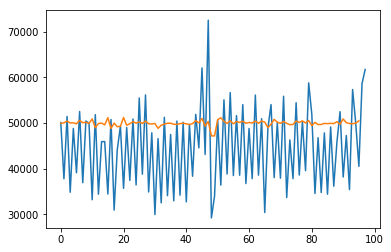

In [9]:
plt.plot(scaler.inverse_transform(y))
plt.plot(scaler.inverse_transform(model.predict(X[:-2], batch_size=32)))

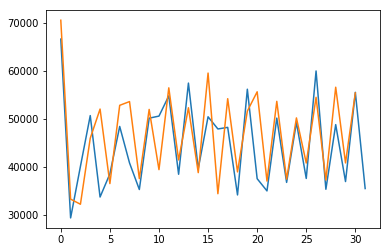

In [17]:
y_hat = scaler.inverse_transform(model.predict(X_test, batch_size=32))
y_real = scaler.inverse_transform(y_test[:-1])

plt.plot(y_hat)
plt.plot(y_real)

In [18]:
from sklearn.metrics import mean_squared_error

In [19]:
def mape(y_true, y_pred):
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

In [25]:
mape(y_true=y_real, y_pred=y_hat[:-1])

11.858636325140955

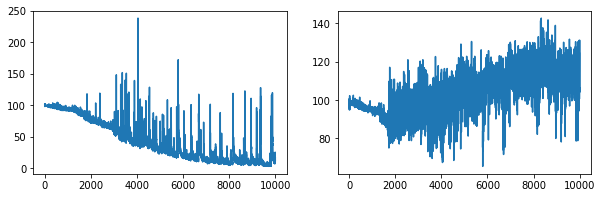

In [21]:
plt.figure(figsize=(10, 3))

plt.subplot(121)
plt.plot(history.history['loss'])

plt.subplot(122)
plt.plot(history.history['val_loss'])

## Grid Search

In [ ]:
from sklearn.model_selection import GridSearchC